___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 ( Data Cleaning )

In [2]:
import numpy as np
import pandas as pd
from skimpy import clean_columns
import re

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


# To display maximum columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

C:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#We cleaned the data in the 1st notebook and prepared a new clean csv, clean_scout.csv.

# PART- 2 `( Handling With Missing Vales )`

In [4]:
df_clean_origin = pd.read_csv("clean_scout.csv")
df = df_clean_origin.copy()
df.head()

,make_model,short_description,body_type,price,vat,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,first_registration,body_color,paint_type,body_color_original,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,next_insp_date,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.0,VAT deductible,56013.0,2.0,Used,2,06/202199 g CO2/km (comb),YesEuro 6,4 (Green),NaN,NaN,2016.0,Black,Metallic,Mythosschwarz,5.0,5.0,Automatic,1422.0,3.0,front,Diesel,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,66.0,06/2021,Yes,NaN,Cloth,Black,1220.0,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,Sedans,14500.0,Price negotiable,80000.0,NaN,Used,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,Red,NaN,NaN,3.0,4.0,Automatic,1798.0,4.0,front,Benzine,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",4 (Green),7.0,141.0,NaN,NaN,NaN,Cloth,Grey,1255.0,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.0,VAT deductible,83450.0,1.0,Used,1,NaN,NaN,99 g CO2/km (comb),NaN,NaN,2016.0,Black,Metallic,mythosschwarz metallic,4.0,4.0,Automatic,1598.0,NaN,front,Diesel,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",4 (Green),NaN,85.0,NaN,NaN,NaN,Cloth,Black,NaN,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500.0,NaN,73000.0,1.0,Used,1,NaN,NaN,NaN,99 g CO2/km (comb),Euro 6,2016.0,Brown,Metallic,NaN,3.0,4.0,Automatic,1422.0,3.0,NaN,Diesel,99.0,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",NaN,6.0,66.0,NaN,NaN,NaN,NaN,NaN,1195.0,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.0,NaN,16200.0,1.0,Used,1,NaN,Yes109 g CO2/km (comb),Euro 6,4 (Green),NaN,2016.0,Black,Metallic,Mythosschwarz Metallic,5.0,5.0,Automatic,1422.0,3.0,front,Diesel,109.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,NaN,66.0,NaN,Yes,NaN,Cloth,Black,NaN,4.1,4.6,3.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15042 non-null  object 
 1   short_description    14993 non-null  object 
 2   body_type            14992 non-null  object 
 3   price                15042 non-null  float64
 4   vat                  10953 non-null  object 
 5   km                   14073 non-null  float64
 6   prev_owner           8647 non-null   float64
 7   type                 15040 non-null  object 
 8   previous_owners      8834 non-null   object 
 9   next_inspection      3436 non-null   object 
 10  inspection_new       3811 non-null   object 
 11  warranty             8728 non-null   object 
 12  full_service         5852 non-null   object 
 13  non_smoking_vehicle  3023 non-null   object 
 14  first_registration   13547 non-null  float64
 15  body_color           14498 non-null 

In [6]:
df.isnull().sum()

make_model                 0
short_description         49
body_type                 50
price                      0
vat                     4089
km                       969
prev_owner              6395
type                       2
previous_owners         6208
next_inspection        11606
inspection_new         11231
warranty                6314
full_service            9190
non_smoking_vehicle    12019
first_registration      1495
body_color               544
paint_type              5421
body_color_original     3283
nr_of_doors              146
nr_of_seats              895
gearing_type               0
displacement_cc          397
cylinders               5265
drive_chain             6486
fuel                       0
co_2_emission           2307
emission_class          3428
comfort_convenience      808
entertainment_media     1204
extras                  2733
safety_security          850
emission_label         11411
gears                   4340
hp_kw                     88
next_insp_date

In [7]:
missing_value_col = []
[missing_value_col.append(i) for i in df.columns if any(df[i].isnull())]
missing_value_col

['short_description',
 'body_type',
 'vat',
 'km',
 'prev_owner',
 'type',
 'previous_owners',
 'next_inspection',
 'inspection_new',
 'warranty',
 'full_service',
 'non_smoking_vehicle',
 'first_registration',
 'body_color',
 'paint_type',
 'body_color_original',
 'nr_of_doors',
 'nr_of_seats',
 'displacement_cc',
 'cylinders',
 'drive_chain',
 'co_2_emission',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'emission_label',
 'gears',
 'hp_kw',
 'next_insp_date',
 'insp_new',
 'warranty_month',
 'upholstery_type',
 'upholstery_color',
 'weight_kg',
 'consumption_comb',
 'consumption_city',
 'consumption_country']

## Checking the columns by missing values

### body_type column

In [8]:
df.body_type.value_counts(dropna=False)

Sedans           7478
Station wagon    3414
Compact          2903
Van               731
Other             289
Transporter        88
Off-Road           56
NaN                50
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [9]:
df.groupby("make_model")["body_type"].value_counts(dropna=False)

make_model      body_type    
Audi A1         Sedans           1486
                Compact           967
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2480
                Station wagon     282
                Compact           148
                Other              16
                Convertible         8
                NaN                 6
                Coupe               4
Opel Astra      Station wagon    1163
                Sedans            992
                Compact           151
                Other              67
                NaN                 4
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1192
                Sedans            849
                Other              87
                Coupe              13
                Tran

In [10]:
df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2490,6,Sedans,1486
Audi A2,1,1,Off-Road,1
Audi A3,2938,6,Sedans,2480
Opel Astra,2376,6,Station wagon,1163
Opel Corsa,2152,7,Compact,1192
Opel Insignia,2478,7,Station wagon,1574
Renault Clio,1634,8,Sedans,829
Renault Duster,34,1,Off-Road,34
Renault Espace,889,8,Van,726


In [11]:
df.groupby("make_model")["body_type"].apply(list)

make_model
Audi A1           [Sedans, Sedans, Sedans, Sedans, Sedans, Sedan...
Audi A2                                                  [Off-Road]
Audi A3           [Convertible, Sedans, Sedans, Sedans, Sedans, ...
Opel Astra        [Station wagon, Station wagon, Station wagon, ...
Opel Corsa        [Sedans, Sedans, Sedans, Compact, Compact, Com...
Opel Insignia     [Station wagon, Sedans, Station wagon, Station...
Renault Clio      [Compact, Station wagon, Sedans, Station wagon...
Renault Duster    [Off-Road, Off-Road, Off-Road, Off-Road, Off-R...
Renault Espace    [nan, Station wagon, Transporter, Van, Van, Tr...
Name: body_type, dtype: object

In [12]:
df.groupby("make_model")["body_type"].apply(lambda x : x.mode())

make_model       
Audi A1         0           Sedans
Audi A2         0         Off-Road
Audi A3         0           Sedans
Opel Astra      0    Station wagon
Opel Corsa      0          Compact
Opel Insignia   0    Station wagon
Renault Clio    0           Sedans
Renault Duster  0         Off-Road
Renault Espace  0              Van
Name: body_type, dtype: object

In [13]:
#fill null values with mode
df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(x.mode()[0]))

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15037       Van
15038       Van
15039       Van
15040       Van
15041       Van
Name: body_type, Length: 15042, dtype: object

In [14]:
df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(x.mode()[0])).value_counts(dropna=False)

Sedans           7499
Station wagon    3419
Compact          2905
Van               753
Other             289
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [15]:
df["body_type"] = df.groupby("make_model")["body_type"].apply(lambda x : x.fillna(x.mode()[0]))

In [16]:
df.groupby("make_model")["body_type"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2490,6,Sedans,1486
Audi A2,1,1,Off-Road,1
Audi A3,2944,6,Sedans,2486
Opel Astra,2380,6,Station wagon,1167
Opel Corsa,2154,7,Compact,1194
Opel Insignia,2479,7,Station wagon,1575
Renault Clio,1649,8,Sedans,844
Renault Duster,34,1,Off-Road,34
Renault Espace,911,8,Van,748


In [17]:
df.body_type.value_counts(dropna=False)

Sedans           7499
Station wagon    3419
Compact          2905
Van               753
Other             289
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

<AxesSubplot:xlabel='body_type', ylabel='price'>

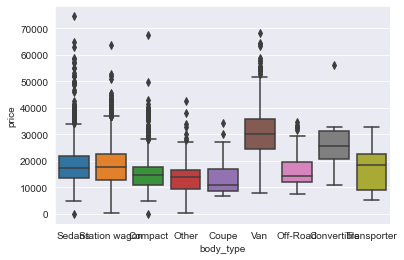

In [295]:
sns.boxplot(x="body_type", y="price", data=df)

### vat column

In [18]:
df.vat.value_counts(dropna=False)

VAT deductible      10527
NaN                  4089
Price negotiable      426
Name: vat, dtype: int64

In [19]:
df.groupby("make_model")["vat"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,1814,2,VAT deductible,1733
Audi A2,1,1,VAT deductible,1
Audi A3,2169,2,VAT deductible,2068
Opel Astra,1822,2,VAT deductible,1777
Opel Corsa,1590,2,VAT deductible,1549
Opel Insignia,1965,2,VAT deductible,1915
Renault Clio,986,2,VAT deductible,912
Renault Duster,16,1,VAT deductible,16
Renault Espace,590,2,VAT deductible,556


In [20]:
df.groupby("make_model")["vat"].value_counts(dropna=False)

make_model      vat             
Audi A1         VAT deductible      1733
                NaN                  676
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      2068
                NaN                  775
                Price negotiable     101
Opel Astra      VAT deductible      1777
                NaN                  558
                Price negotiable      45
Opel Corsa      VAT deductible      1549
                NaN                  564
                Price negotiable      41
Opel Insignia   VAT deductible      1915
                NaN                  514
                Price negotiable      50
Renault Clio    VAT deductible       912
                NaN                  663
                Price negotiable      74
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       556
                NaN                  321
                Price ne

In [21]:
df.groupby("vat")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
vat,,,,,,,,
Price negotiable,426.0,16097.152582,6345.227414,6250.0,11900.0,15449.5,18967.5,57400.0
VAT deductible,10527.0,18806.158640,7500.754983,4990.0,13680.0,17899.0,22750.0,74600.0


In [22]:
#We will drop this column because there is no other data that we can fill in null values.
df.drop(columns="vat", inplace=True)

### type column

In [23]:
df.type.value_counts(dropna=False)

Used              10435
New                1548
Pre-registered     1287
Employee's car      976
Demonstration       794
NaN                   2
Name: type, dtype: int64

In [24]:
df.groupby("make_model")["type"].value_counts(dropna=False)

make_model      type          
Audi A1         Used              1706
                New                311
                Employee's car     197
                Pre-registered     142
                Demonstration      134
Audi A2         Employee's car       1
Audi A3         Used              2110
                New                298
                Pre-registered     266
                Employee's car     206
                Demonstration       62
                NaN                  2
Opel Astra      Used              1693
                New                248
                Demonstration      164
                Employee's car     152
                Pre-registered     123
Opel Corsa      Used              1408
                Pre-registered     365
                Employee's car     148
                New                144
                Demonstration       89
Opel Insignia   Used              1752
                New                340
                Demonstration    

In [25]:
df.groupby("type")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Demonstration,761.0,5112.817346,7412.928598,3.0,550.00,3000.0,6000.0,78000.0
Employee's car,968.0,20131.083678,14880.068627,1.0,9268.75,20000.0,27188.0,112789.0
New,749.0,17.592790,98.180062,0.0,5.00,10.0,10.0,2500.0
Pre-registered,1174.0,155.218910,975.688396,1.0,9.00,10.0,25.0,15378.0
Used,10420.0,43097.636468,38293.038579,1.0,15500.00,29325.5,63000.0,317000.0


In [26]:
df.type.mode()

0    Used
dtype: object

In [27]:
#fill with mode
df["type"] = df.type.fillna(df.type.mode()[0])

In [28]:
df.type.isnull().sum()

0

<AxesSubplot:xlabel='type', ylabel='price'>

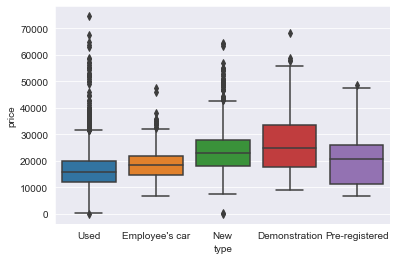

In [296]:
sns.boxplot(x="type", y="price", data=df)

### first_registration -age column

In [29]:
# from first_registration column create a new column: age.
df["age"] = 2019 - df.first_registration

In [30]:
df.age

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15037    NaN
15038    0.0
15039    0.0
15040    0.0
15041    0.0
Name: age, Length: 15042, dtype: float64

In [31]:
#drop first_registation column
df.drop(columns="first_registration", inplace=True)

In [32]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'prev_owner', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'body_color', 'paint_type', 'body_color_original', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement_cc', 'cylinders',
       'drive_chain', 'fuel', 'co_2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'hp_kw', 'next_insp_date',
       'insp_new', 'warranty_month', 'upholstery_type', 'upholstery_color',
       'weight_kg', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age'],
      dtype='object')

In [33]:
df.age.isnull().sum()

1495

In [34]:
df.groupby("type")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Demonstration,789.0,0.240811,0.516536,0.0,0.0,0.0,0.0,3.0
Employee's car,973.0,1.007194,0.547111,0.0,1.0,1.0,1.0,3.0
New,103.0,0.029126,0.168983,0.0,0.0,0.0,0.0,1.0
Pre-registered,1281.0,0.124902,0.355773,0.0,0.0,0.0,0.0,3.0
Used,10401.0,1.846746,0.965746,0.0,1.0,2.0,3.0,3.0


In [35]:
#Grouping by type and filling age according to median
df["age"] = df.groupby("type")["age"].apply(lambda x : x.fillna(x.median()))

In [36]:
df.age.isnull().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15042 non-null  object 
 1   short_description    14993 non-null  object 
 2   body_type            15042 non-null  object 
 3   price                15042 non-null  float64
 4   km                   14073 non-null  float64
 5   prev_owner           8647 non-null   float64
 6   type                 15042 non-null  object 
 7   previous_owners      8834 non-null   object 
 8   next_inspection      3436 non-null   object 
 9   inspection_new       3811 non-null   object 
 10  warranty             8728 non-null   object 
 11  full_service         5852 non-null   object 
 12  non_smoking_vehicle  3023 non-null   object 
 13  body_color           14498 non-null  object 
 14  paint_type           9621 non-null   object 
 15  body_color_original  11759 non-null 

In [38]:
df.age.describe()

count    15042.000000
mean         1.370562
std          1.117476
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='price'>

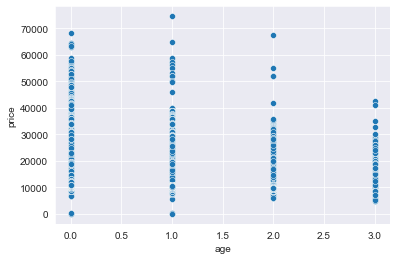

In [297]:
sns.scatterplot(x="age", y="price", data=df)

### km column

In [39]:
df.km.value_counts(dropna=False)

NaN       969
10.0      965
1.0       349
5.0       161
100.0     139
         ... 
54.0        1
42.0        1
1794.0      1
5586.0      1
57.0        1
Name: km, Length: 6690, dtype: int64

In [40]:
df.groupby("age")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,3311.0,1712.289943,4920.725665,0.0,10.00,15.0,1501.0,127022.0
1.0,4352.0,18078.556985,10939.413135,1.0,9998.75,18000.0,25100.0,136000.0
2.0,3011.0,41965.580870,28560.534096,1.0,21989.00,35000.0,55400.0,317000.0
3.0,3399.0,77099.152692,39564.694940,10.0,47000.00,72761.0,99000.0,291800.0


In [41]:
df.km.describe()

count     14073.000000
mean      33593.807717
std       37161.025750
min           0.000000
25%        5000.000000
50%       22321.000000
75%       48523.000000
max      317000.000000
Name: km, dtype: float64

In [42]:
df.groupby(["type","age"])["km"].describe()

count          mean           std      min       25%  \
type           age                                                          
Demonstration  0.0   602.0   3385.001661   3541.139303      3.0    500.00   
               1.0   130.0   8294.200000   7998.986641      8.0   1601.00   
               2.0    27.0  25327.296296  17914.687197     20.0  15470.50   
               3.0     2.0  45500.000000  14849.242405  35000.0  40250.00   
Employee's car 0.0   119.0   4489.462185   5503.982783      1.0    125.00   
               1.0   734.0  19393.668937   9381.857803      1.0  11300.00   
               2.0    98.0  37883.551020  22041.063256     59.0  21707.00   
               3.0    17.0  59123.647059  28115.753329   7790.0  40700.00   
New            0.0   747.0     17.496653     98.264462      0.0      5.00   
               1.0     2.0     53.500000     65.760931      7.0     30.25   
Pre-registered 0.0  1051.0    104.323501    664.403693      1.0      8.00   
               1.0   114.0    490.245614   2050.823562      1.0     10.00   
               2.0     8.0   2085.625000   4351.342976      1.0      7.75   
               3.0     1.0     10.000000           NaN     10.0     10.00   
Used           0.0   792.0   3755.885101   8547.647183      1.0     44.00   
               1.0  3372.0  18774.817912  10840.872028      1.0  10922.25   
               2.0  2878.0  42371.526755  28746.032717      5.0  22220.75   
               3.0  3379.0  77231.106244  39583.198975     35.0  47005.50   

                        50%       75%       max  
type           age                               
Demonstration  0.0   2900.0   5000.00   20000.0  
               1.0   5192.5  13737.50   38400.0  
               2.0  18900.0  28238.00   78000.0  
               3.0  45500.0  50750.00   56000.0  
Employee's car 0.0   3811.0   6224.50   37500.0  
               1.0  21050.0  26983.00   80009.0  
               2.0  37576.0  46500.00  112789.0  
               3.0  58962.0  84386.00  103000.0  
New            0.0     10.0     10.00    2500.0  
               1.0     53.5     76.75     100.0  
Pre-registered 0.0     10.0     20.00    9998.0  
               1.0     20.0    100.00   15378.0  
               2.0    110.0   1114.75   12300.0  
               3.0     10.0     10.00      10.0  
Used           0.0   1500.0   5000.00  127022.0  
               1.0  18100.0  25078.50  136000.0  
               2.0  35000.0  56477.25  317000.0  
               3.0  73000.0  99000.00  291800.0

In [43]:
#Grouping by type and age, filling km according to median
df.groupby(["type","age"])["km"].apply(lambda x : x.fillna(x.median())).isnull().sum()

0

In [44]:
df["km"] = df.groupby(["type","age"])["km"].apply(lambda x : x.fillna(x.median()))

In [45]:
df.km.isnull().sum()

0

In [46]:
df.km.describe()

count     15042.000000
mean      31459.224538
std       36860.079058
min           0.000000
25%        1855.500000
50%       20000.000000
75%       45065.750000
max      317000.000000
Name: km, dtype: float64

### prev_owner column

In [47]:
df.prev_owner.value_counts(dropna=False)

1.0    7977
NaN    6395
2.0     651
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [48]:
df.previous_owners.value_counts(dropna=False)

1                                                                7786
NaN                                                              6208
2                                                                 639
0                                                                 162
3                                                                  17
                                                                 ... 
1111 g CO2/km (comb)                                                1
1Euro 6                                                             1
2119 g CO2/km (comb)                                                1
16.6 l/100 km (comb)8.1 l/100 km (city)5.7 l/100 km (country)       1
1142 g CO2/km (comb)                                                1
Name: previous_owners, Length: 102, dtype: int64

In [49]:
df.groupby("age")["prev_owner"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,1546.0,1.006468,0.080191,1.0,1.0,1.0,1.0,2.0
1.0,2963.0,1.024975,0.156074,1.0,1.0,1.0,1.0,2.0
2.0,1849.0,1.128718,0.350761,1.0,1.0,1.0,1.0,4.0
3.0,2289.0,1.161206,0.382938,1.0,1.0,1.0,1.0,4.0


In [50]:
df.previous_owners.value_counts(dropna=False)

1                                                                7786
NaN                                                              6208
2                                                                 639
0                                                                 162
3                                                                  17
                                                                 ... 
1111 g CO2/km (comb)                                                1
1Euro 6                                                             1
2119 g CO2/km (comb)                                                1
16.6 l/100 km (comb)8.1 l/100 km (city)5.7 l/100 km (country)       1
1142 g CO2/km (comb)                                                1
Name: previous_owners, Length: 102, dtype: int64

In [51]:
df["prev_owner"] = df.previous_owners.str.extract(r"(\d)")

In [52]:
df.prev_owner.isnull().sum()

6208

In [53]:
df.prev_owner.value_counts(dropna=False)

1      7977
NaN    6208
2       651
0       187
3        17
4         2
Name: prev_owner, dtype: int64

In [54]:
df.groupby("type")["prev_owner"].describe()

,count,unique,top,freq
type,,,,
Demonstration,512,2,1,506
Employee's car,630,3,1,616
New,178,2,0,163
Pre-registered,789,2,1,783
Used,6725,5,1,6057


In [55]:
df.groupby(["age","type"])["prev_owner"].value_counts(dropna=False)

age  type            prev_owner
0.0  Demonstration   1              392
                     NaN            242
                     2                1
     Employee's car  1               72
                     NaN             52
                     2                1
     New             NaN           1368
                     0              163
                     1               14
     Pre-registered  1              694
                     NaN            438
                     2                5
     Used            NaN            429
                     1              364
                     2                3
1.0  Demonstration   1               94
                     NaN             34
                     2                2
     Employee's car  1              507
                     NaN            216
                     2                9
                     0                4
     New             NaN              2
                     1                1
     Pre

In [56]:
df.groupby("type")["prev_owner"].value_counts(dropna=False)

type            prev_owner
Demonstration   1              506
                NaN            282
                2                6
Employee's car  1              616
                NaN            346
                2               10
                0                4
New             NaN           1370
                0              163
                1               15
Pre-registered  1              783
                NaN            498
                2                6
Used            1             6057
                NaN           3712
                2              629
                0               20
                3               17
                4                2
Name: prev_owner, dtype: int64

In [57]:
df.groupby("type")["prev_owner"].apply(lambda x : x.fillna(x.mode()[0]))

0        2
1        1
2        1
3        1
4        1
        ..
15037    0
15038    1
15039    1
15040    1
15041    1
Name: prev_owner, Length: 15042, dtype: object

In [58]:
df.groupby("prev_owner").price.describe()

,count,mean,std,min,25%,50%,75%,max
prev_owner,,,,,,,,
0,187.0,20748.855615,7674.855106,6299.0,14987.0,21700.0,24373.5,52120.0
1,7977.0,17242.730600,6563.183428,5250.0,12790.0,16350.0,20800.0,74600.0
2,651.0,14730.920123,5134.060946,6400.0,10770.0,14950.0,17895.0,35990.0
3,17.0,14676.235294,5901.805894,7500.0,10598.0,13100.0,17900.0,27000.0
4,2.0,20150.000000,1626.345597,19000.0,19575.0,20150.0,20725.0,21300.0


In [59]:
df["prev_owner"] = df.groupby("type")["prev_owner"].apply(lambda x : x.fillna(x.mode()[0]))

In [60]:
df["prev_owner"].isnull().sum()

0

In [61]:
df["prev_owner"].dtype

dtype('O')

In [62]:
df["prev_owner"] = df["prev_owner"].astype(float)

In [63]:
df["prev_owner"].dtype

dtype('float64')

In [64]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'prev_owner', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'body_color', 'paint_type', 'body_color_original', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement_cc', 'cylinders',
       'drive_chain', 'fuel', 'co_2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emission_label', 'gears', 'hp_kw', 'next_insp_date',
       'insp_new', 'warranty_month', 'upholstery_type', 'upholstery_color',
       'weight_kg', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age'],
      dtype='object')

<AxesSubplot:xlabel='prev_owner', ylabel='price'>

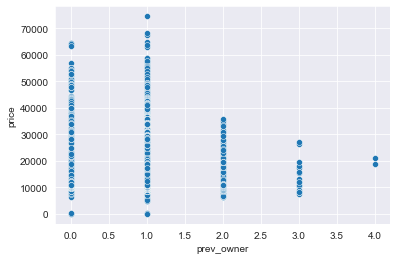

In [298]:
sns.scatterplot(x="prev_owner", y="price", data=df)

### previous_owners column

In [65]:
df.previous_owners.value_counts(dropna=False)

1                                                                7786
NaN                                                              6208
2                                                                 639
0                                                                 162
3                                                                  17
                                                                 ... 
1111 g CO2/km (comb)                                                1
1Euro 6                                                             1
2119 g CO2/km (comb)                                                1
16.6 l/100 km (comb)8.1 l/100 km (city)5.7 l/100 km (country)       1
1142 g CO2/km (comb)                                                1
Name: previous_owners, Length: 102, dtype: int64

### next_inspection  column    

In [66]:
df.next_inspection.value_counts(dropna=False).head(50)

NaN                           11606
04/2022                          62
06/2021                          47
03/2021                          39
03/2022                          36
01/2022                          32
04/2021                          31
06/2021Euro 6                    29
03/2020                          27
05/2021                          27
05/2022                          26
06/2021119 g CO2/km (comb)       23
06/202197 g CO2/km (comb)        22
06/20214 (Green)                 21
06/2021102 g CO2/km (comb)       20
02/2021                          19
01/2023                          19
02/2020                          18
01/2020                          16
04/2020                          16
02/2022                          16
01/2021                          16
06/202199 g CO2/km (comb)        15
09/2021                          14
05/20214 (Green)                 14
08/2021135 g CO2/km (comb)       14
06/2022                          14
07/2019                     

### next_insp_date 

In [67]:
df.next_insp_date.value_counts(dropna=False)

NaN        11606
06/2021      471
03/2021      208
05/2021      171
04/2021      169
           ...  
05/2014        1
04/2016        1
01/1955        1
01/2018        1
11/2022        1
Name: next_insp_date, Length: 78, dtype: int64

### inspection_new column

In [68]:
df.inspection_new.value_counts(dropna=False)

NaN                                                                11231
YesEuro 6                                                            519
Yes                                                                  427
Yes102 g CO2/km (comb)                                               174
Yes4 (Green)                                                         166
                                                                   ...  
Yes100 g CO2/km (comb)                                                 1
Yes4.9 l/100 km (comb)5.9 l/100 km (city)4.3 l/100 km (country)        1
Yes5.1 l/100 km (comb)6.4 l/100 km (city)4.3 l/100 km (country)        1
Yes6.3 l/100 km (comb)                                                 1
Yes172 g CO2/km (comb)                                                 1
Name: inspection_new, Length: 202, dtype: int64

### insp_new column

In [69]:
df.insp_new.value_counts(dropna=False)

NaN    11231
Yes     3811
Name: insp_new, dtype: int64

In [70]:
df.groupby("age")["insp_new"].value_counts(dropna=False)

age  insp_new
0.0  NaN         3074
     Yes         1164
1.0  NaN         3214
     Yes         1177
2.0  NaN         2448
     Yes          566
3.0  NaN         2495
     Yes          904
Name: insp_new, dtype: int64

In [71]:
df.groupby(["age","insp_new"])["next_insp_date"].value_counts(dropna=False)

age  insp_new  next_insp_date
0.0  Yes       NaN               903
               06/2021            73
               05/2022            49
               02/2022            27
               01/2022            23
                                ... 
3.0  Yes       03/2020             1
               07/2021             1
               08/2020             1
               11/2020             1
               12/2019             1
Name: next_insp_date, Length: 95, dtype: int64

In [72]:
#It can be dropped because next_insp_date has no effect.
df.drop(columns="next_insp_date", inplace=True)

In [73]:
df.loc[(df.age <=1) & (pd.isnull(df.insp_new)), "insp_new"] = "Yes"

In [74]:
df.insp_new.value_counts(dropna=False)

Yes    10099
NaN     4943
Name: insp_new, dtype: int64

In [75]:
df.loc[(df.age > 1) & (pd.isnull(df.insp_new)), "insp_new"] = "No"
# df.insp_new.fillna("No", inplace = True)

In [76]:
df.insp_new.value_counts(dropna=False)

Yes    10099
No      4943
Name: insp_new, dtype: int64

### warranty column

In [77]:
df.warranty.value_counts(dropna=False)

NaN                                                                    6314
Euro 6                                                                 1830
12 months                                                              1078
24 months                                                               556
4 (Green)                                                               516
                                                                       ... 
2 months                                                                  1
72 months125 g CO2/km (comb)                                              1
60 months14 g CO2/km (comb)                                               1
24 months121 g CO2/km (comb)                                              1
36 months7.4 l/100 km (comb)9.6 l/100 km (city)6 l/100 km (country)       1
Name: warranty, Length: 506, dtype: int64

### warranty_month column

In [78]:
df.warranty_month.value_counts(dropna=False)

NaN     10521
12.0     2336
24.0     1075
60.0      392
36.0      261
48.0      145
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
4.0         3
1.0         3
19.0        3
34.0        3
13.0        3
28.0        2
22.0        2
14.0        2
11.0        2
46.0        2
21.0        2
9.0         2
17.0        2
45.0        2
33.0        1
40.0        1
65.0        1
10.0        1
15.0        1
7.0         1
8.0         1
56.0        1
49.0        1
47.0        1
30.0        1
Name: warranty_month, dtype: int64

In [79]:
df.groupby("age")["warranty_month"].value_counts(dropna=False)

age  warranty_month
0.0  NaN               3119
     24.0               523
     12.0               216
     60.0               108
     36.0               100
                       ... 
3.0  21.0                 1
     23.0                 1
     26.0                 1
     40.0                 1
     48.0                 1
Name: warranty_month, Length: 83, dtype: int64

In [80]:
df.groupby(["make_model","age"])["warranty_month"].value_counts(dropna=False).head(60)

make_model  age  warranty_month
Audi A1     0.0  NaN               579
                 24.0              102
                 12.0               38
                 36.0               26
                 48.0               15
                 60.0               14
                 18.0                1
                 56.0                1
            1.0  NaN               505
                 24.0               87
                 12.0               62
                 36.0               26
                 48.0               26
                 60.0               11
                 6.0                 9
                 50.0                3
                 13.0                1
                 20.0                1
                 23.0                1
                 26.0                1
                 46.0                1
                 47.0                1
                 49.0                1
            2.0  NaN               279
                 12.0           

In [81]:
df.groupby("age")["warranty_month"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,1119.0,30.365505,17.235284,2.0,24.0,24.0,36.0,72.0
1.0,1315.0,22.885171,15.420135,1.0,12.0,12.0,24.0,60.0
2.0,1004.0,17.438247,12.484214,1.0,12.0,12.0,24.0,60.0
3.0,1083.0,17.843029,14.950112,1.0,12.0,12.0,12.0,60.0


In [82]:
df.groupby("age")["warranty_month"].apply(lambda x : x.mode()[0])

age
0.0    24.0
1.0    12.0
2.0    12.0
3.0    12.0
Name: warranty_month, dtype: float64

In [83]:
df.groupby(["make_model","age"])["warranty_month"].apply(lambda x : x.mode())

make_model      age   
Audi A1         0.0  0    24.0
                1.0  0    24.0
                2.0  0    12.0
                3.0  0    12.0
Audi A3         0.0  0    24.0
                1.0  0    24.0
                2.0  0    12.0
                3.0  0    12.0
Opel Astra      0.0  0    24.0
                1.0  0    12.0
                2.0  0    12.0
                3.0  0    12.0
Opel Corsa      0.0  0    24.0
                1.0  0    12.0
                2.0  0    12.0
                3.0  0    12.0
Opel Insignia   0.0  0    24.0
                1.0  0    12.0
                2.0  0    12.0
                3.0  0    12.0
Renault Clio    0.0  0    24.0
                1.0  0    12.0
                2.0  0    12.0
                3.0  0    12.0
Renault Duster  0.0  0    12.0
Renault Espace  0.0  0    24.0
                1.0  0    12.0
                2.0  0    12.0
                3.0  0    12.0
Name: warranty_month, dtype: float64

In [84]:
df.loc[(df.make_model == "Audi A2"), "warranty_month"] = 12

In [85]:
df.groupby(["make_model","age"])["warranty_month"].apply(lambda x : x.fillna(x.mode()[0]))

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
15037    24.0
15038    24.0
15039    24.0
15040    24.0
15041    24.0
Name: warranty_month, Length: 15042, dtype: float64

In [86]:
df["warranty_month"] = df.groupby(["make_model","age"])["warranty_month"].apply(lambda x : x.fillna(x.mode()[0]))

In [87]:
df.warranty_month.isnull().sum()

0

### full_service column

In [88]:
df.full_service.value_counts(dropna=False)

NaN                                                             9190
4 (Green)                                                       2172
Euro 6                                                          2087
Euro 6d-TEMP                                                     381
120 g CO2/km (comb)                                               67
                                                                ... 
84 g CO2/km (comb)                                                 1
87 g CO2/km (comb)                                                 1
5.4 l/100 km (comb)                                                1
5.7 l/100 km (comb)7.3 l/100 km (city)4.9 l/100 km (country)       1
Euro 4                                                             1
Name: full_service, Length: 121, dtype: int64

In [89]:
# df['warranty_month'] = df.groupby(["make_model","age"])['warranty_month'].apply(
#                         lambda x : x.fillna(x.mode()[0]) if any(x.mode()) else x)

### non_smoking_vehicle column

In [90]:
df.non_smoking_vehicle.value_counts(dropna=False)

NaN                                                             12019
4 (Green)                                                        1237
Euro 6                                                            845
Euro 6d-TEMP                                                      345
120 g CO2/km (comb)                                                37
                                                                ...  
6.2 l/100 km (comb)7.9 l/100 km (city)5.3 l/100 km (country)        1
91 g CO2/km (comb)                                                  1
6.5 l/100 km (comb)8.5 l/100 km (city)5.4 l/100 km (country)        1
5.7 l/100 km (comb)7.3 l/100 km (city)4.7 l/100 km (country)        1
175 g CO2/km (comb)                                                 1
Name: non_smoking_vehicle, Length: 93, dtype: int64

### body_color column

In [91]:
df.body_color.value_counts(dropna=False)

Black     3583
Grey      3331
White     3159
Silver    1580
Blue      1374
Red        866
NaN        544
Brown      278
Green      149
Beige       98
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [92]:
df.body_color.unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Silver', 'Blue', nan,
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange', 'Gold'],
      dtype=object)

In [93]:
body_color_list = list(df.body_color.dropna().unique())
body_color_list

['Black',
 'Red',
 'Brown',
 'White',
 'Grey',
 'Silver',
 'Blue',
 'Beige',
 'Violet',
 'Yellow',
 'Green',
 'Bronze',
 'Orange',
 'Gold']

In [94]:
df.groupby(["make_model","body_type"])["body_color"].value_counts(dropna=False).head(50)

make_model  body_type      body_color
Audi A1     Compact        Black         289
                           White         244
                           Grey          125
                           Blue           95
                           Red            87
                           Silver         42
                           NaN            39
                           Yellow         16
                           Green          15
                           Brown           9
                           Beige           6
            Coupe          Black           2
            Other          White           5
                           Black           4
                           Grey            3
                           Blue            1
            Sedans         White         408
                           Black         378
                           Grey          192
                           Blue          180
                           Red           159
                 

In [95]:
 df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.mode()[0] if any(x.mode()) else x )

make_model      body_type    
Audi A1         Compact                                                      Black
                Coupe                                                        Black
                Other                                                        White
                Sedans                                                       White
                Station wagon                                                White
                Van                                                          Black
Audi A2         Off-Road                                                      Grey
Audi A3         Compact                                                      Black
                Convertible                                                  White
                Coupe                                                       Silver
                Other                                                        Black
                Sedans                                   

In [96]:
df.groupby(["body_color"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
body_color,,,,,,,,
Beige,98.0,17031.969388,6594.619183,6499.0,11440.00,16115.0,21445.00,36771.0
Black,3583.0,19003.767792,7629.773198,6200.0,13999.00,17490.0,22490.00,74600.0
Blue,1374.0,17221.007278,6964.433279,5990.0,12400.00,15990.0,20800.00,58990.0
Bronze,6.0,17458.166667,5911.970921,5950.0,17550.00,19700.0,19974.25,22500.0
Brown,278.0,18522.352518,5997.430461,7000.0,14990.00,17460.0,20685.00,47990.0
Gold,2.0,134.000000,171.119841,13.0,73.50,134.0,194.50,255.0
Green,149.0,17714.503356,5728.981655,6290.0,13490.00,17500.0,21500.00,38450.0
Grey,3331.0,18881.411888,7885.179951,120.0,13400.00,17980.0,22800.00,64900.0
Orange,3.0,18166.666667,17347.438091,5555.0,8275.00,10995.0,24472.50,37950.0


In [97]:
df["body_color"] = df.groupby(["make_model","body_type"]).body_color.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.body_color.mode()[0]))

In [98]:
df["body_color"].value_counts(dropna=False)

Black     3768
Grey      3606
White     3239
Silver    1580
Blue      1374
Red        866
Brown      278
Green      153
Beige       98
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [99]:
df["body_color"].isnull().sum()

0

In [100]:
df.groupby(["body_color"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
body_color,,,,,,,,
Beige,98.0,17031.969388,6594.619183,6499.0,11440.00,16115.0,21445.00,36771.0
Black,3768.0,19098.782909,7512.722903,6200.0,14400.00,17890.0,22500.00,74600.0
Blue,1374.0,17221.007278,6964.433279,5990.0,12400.00,15990.0,20800.00,58990.0
Bronze,6.0,17458.166667,5911.970921,5950.0,17550.00,19700.0,19974.25,22500.0
Brown,278.0,18522.352518,5997.430461,7000.0,14990.00,17460.0,20685.00,47990.0
Gold,2.0,134.000000,171.119841,13.0,73.50,134.0,194.50,255.0
Green,153.0,18110.326797,6153.868948,6290.0,13695.00,17600.0,21900.00,38450.0
Grey,3606.0,19240.521908,7924.299870,120.0,13631.25,18480.0,23247.50,64900.0
Orange,3.0,18166.666667,17347.438091,5555.0,8275.00,10995.0,24472.50,37950.0


### body_color_original column

In [101]:
df.body_color_original.value_counts(dropna=False)

NaN                              3283
Onyx Schwarz                      335
Mythosschwarz Metallic            235
Bianco                            212
Brillantschwarz                   210
                                 ... 
mythosschwarz perl                  1
White & Black                       1
BLAU                                1
Schneeweiss / Dach Schwarz          1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1915, dtype: int64

In [102]:
df.drop(columns="body_color_original", inplace=True)

In [103]:
df.shape

(15042, 40)

### paint_type column

In [104]:
df.paint_type.value_counts(dropna=False)

Metallic       9270
NaN            5421
Uni/basic       345
Perl effect       6
Name: paint_type, dtype: int64

In [105]:
df.groupby(["paint_type"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
paint_type,,,,,,,,
Metallic,9270.0,18710.140561,7407.565483,120.0,13900.0,17495.0,22350.0,68320.0
Perl effect,6.0,15428.333333,7520.285677,8500.0,9567.5,14400.0,17867.5,28290.0
Uni/basic,345.0,17706.944928,6655.862465,6899.0,11300.0,17700.0,22500.0,37599.0


In [106]:
df.paint_type

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15037    Metallic
15038    Metallic
15039         NaN
15040         NaN
15041    Metallic
Name: paint_type, Length: 15042, dtype: object

In [107]:
df.groupby(["make_model","body_type","body_color"]).paint_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.paint_type.mode()[0])).value_counts()

Metallic       14508
Uni/basic        528
Perl effect        6
Name: paint_type, dtype: int64

In [108]:
df["paint_type"] = df.groupby(["make_model","body_type","body_color"]).paint_type.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.paint_type.mode()[0]))

In [109]:
df["paint_type"].isnull().sum()

0

In [110]:
# The same result is obtained when filled with bfill and ffill.

# df["paint_type"] = df.groupby(["make_model", "body_type", "body_color"]).paint_type.fillna(method="ffill").fillna(method="bfill")

In [111]:
df.groupby(["paint_type"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
paint_type,,,,,,,,
Metallic,14508.0,18229.098497,7418.557794,13.0,12990.0,16990.0,21989.25,74600.0
Perl effect,6.0,15428.333333,7520.285677,8500.0,9567.5,14400.0,17867.50,28290.0
Uni/basic,528.0,14954.039773,6782.893805,5499.0,9495.0,12600.0,19990.00,37599.0


<AxesSubplot:xlabel='paint_type', ylabel='price'>

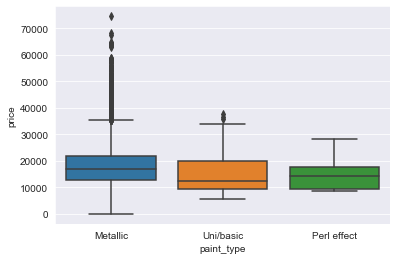

In [299]:
sns.boxplot(x="paint_type", y="price", data=df)

### nr_of_doors column

In [112]:
df.nr_of_doors.value_counts(dropna=False)

5.0    11005
4.0     2872
3.0      823
2.0      194
NaN      146
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [113]:
df[df.nr_of_doors == 1]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country,age
13057,Renault Clio,Business Energy dCi 75 eco2 Euro 6,Compact,8500.0,41493.0,1.0,Used,NaN,NaN,NaN,12 months,NaN,NaN,White,Metallic,1.0,NaN,Manual,1461.0,NaN,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,No,12.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [114]:
df[df.nr_of_doors == 7]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country,age
14372,Renault Espace,Initiale Paris,Van,21600.0,78000.0,1.0,Used,NaN,04/2020,NaN,NaN,Euro 6,NaN,Brown,Metallic,7.0,NaN,Automatic,1598.0,4.0,front,Diesel,120.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",NaN,6.0,118.0,No,12.0,Full leather,Brown,1734.0,4.6,5.0,4.4,3.0


In [115]:
df.groupby(["make_model", "body_type"])["nr_of_doors"].value_counts(dropna=False).head(50)

make_model  body_type      nr_of_doors
Audi A1     Compact        5.0             645
                           4.0             182
                           3.0              79
                           2.0              44
                           NaN              17
            Coupe          2.0               1
                           5.0               1
            Other          5.0               8
                           4.0               5
            Sedans         5.0            1022
                           4.0             295
                           3.0             130
                           2.0              29
                           NaN              10
            Station wagon  5.0              17
                           4.0               3
                           3.0               1
            Van            5.0               1
Audi A2     Off-Road       5.0               1
Audi A3     Compact        5.0             130
                     

In [116]:
df.groupby("nr_of_doors").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_doors,,,,,,,,
1.0,1.0,8500.000000,NaN,8500.0,8500.0,8500.0,8500.0,8500.0
2.0,194.0,12867.634021,5373.953700,5300.0,9800.0,12432.5,15587.5,56100.0
3.0,823.0,12560.469016,4018.836957,13.0,9780.0,11399.0,15390.0,23600.0
4.0,2872.0,18297.108983,6441.459366,5890.0,13990.0,17777.0,21500.0,74600.0
5.0,11005.0,18594.791549,7677.877872,120.0,12990.0,17489.0,22700.0,68320.0
7.0,1.0,21600.000000,NaN,21600.0,21600.0,21600.0,21600.0,21600.0


In [117]:
df["nr_of_doors"] = df.groupby(["make_model", "body_type"])["nr_of_doors"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_doors.mode()[0]))

In [118]:
df["nr_of_doors"].isnull().sum()

0

In [119]:
df.groupby("nr_of_doors").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_doors,,,,,,,,
1.0,1.0,8500.000000,NaN,8500.0,8500.0,8500.0,8500.0,8500.0
2.0,194.0,12867.634021,5373.953700,5300.0,9800.0,12432.5,15587.5,56100.0
3.0,823.0,12560.469016,4018.836957,13.0,9780.0,11399.0,15390.0,23600.0
4.0,2872.0,18297.108983,6441.459366,5890.0,13990.0,17777.0,21500.0,74600.0
5.0,11151.0,18567.220877,7677.588841,120.0,12990.0,17470.0,22690.0,68320.0
7.0,1.0,21600.000000,NaN,21600.0,21600.0,21600.0,21600.0,21600.0


<AxesSubplot:xlabel='nr_of_doors', ylabel='price'>

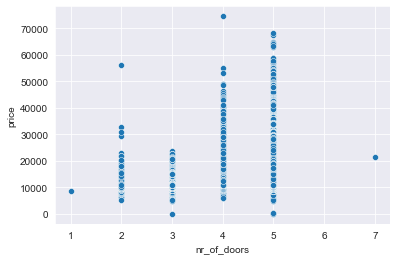

In [300]:
sns.scatterplot(x="nr_of_doors", y="price", data=df)

### nr_of_seats column

In [120]:
df.nr_of_seats.value_counts(dropna=False)

5.0    12643
4.0     1088
NaN      895
7.0      317
2.0       96
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [121]:
df.groupby(["make_model", "body_type"])["nr_of_seats"].value_counts(dropna=False)

make_model      body_type    nr_of_seats
Audi A1         Compact      5.0            493
                             4.0            404
                             NaN             68
                             3.0              1
                             6.0              1
                                           ... 
Renault Espace  Transporter  NaN              1
                Van          5.0            375
                             7.0            272
                             NaN            100
                             4.0              1
Name: nr_of_seats, Length: 116, dtype: int64

In [122]:
df.groupby("nr_of_seats").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_seats,,,,,,,,
2.0,96.0,8593.802083,1851.883739,5250.0,7500.0,8400.0,9900.0,20450.0
3.0,1.0,23090.000000,NaN,23090.0,23090.0,23090.0,23090.0,23090.0
4.0,1088.0,17215.002757,4116.588229,8000.0,14450.0,16392.5,19512.5,68320.0
5.0,12643.0,17894.456458,7188.057777,13.0,12500.0,16950.0,21900.0,74600.0
6.0,2.0,27995.000000,20499.025587,13500.0,20747.5,27995.0,35242.5,42490.0
7.0,317.0,31495.082019,8959.956431,13500.0,24900.0,29990.0,36781.0,64332.0


In [123]:
df["nr_of_seats"] = df.groupby(["make_model", "body_type"])["nr_of_seats"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.nr_of_seats.mode()[0]))

In [124]:
df.groupby("nr_of_seats").price.describe()

,count,mean,std,min,25%,50%,75%,max
nr_of_seats,,,,,,,,
2.0,99.0,8558.434343,1840.986915,5250.0,7500.0,8400.0,9900.0,20450.0
3.0,1.0,23090.000000,NaN,23090.0,23090.0,23090.0,23090.0,23090.0
4.0,1090.0,17241.158716,4158.330130,8000.0,14455.0,16397.5,19550.0,68320.0
5.0,13533.0,17937.847853,7275.091936,13.0,12500.0,16950.0,21900.0,74600.0
6.0,2.0,27995.000000,20499.025587,13500.0,20747.5,27995.0,35242.5,42490.0
7.0,317.0,31495.082019,8959.956431,13500.0,24900.0,29990.0,36781.0,64332.0


In [125]:
df["nr_of_seats"].isnull().sum()

0

In [126]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13533
4.0     1090
7.0      317
2.0       99
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [127]:
df.groupby(["make_model", "body_type","nr_of_seats"]).price.describe()

count          mean          std  \
make_model     body_type   nr_of_seats                                     
Audi A1        Compact     3.0            1.0  23090.000000          NaN   
                           4.0          404.0  17384.121287  3730.673085   
                           5.0          561.0  20813.816399  4689.546816   
                           6.0            1.0  13500.000000          NaN   
               Coupe       4.0            1.0  13950.000000          NaN   
...                                       ...           ...          ...   
Renault Espace Transporter 5.0           36.0  21780.222222  3762.648081   
                           7.0           16.0  24465.562500  4731.331919   
               Van         4.0            1.0  68320.000000          NaN   
                           5.0          475.0  30574.894737  8611.736733   
                           7.0          272.0  31866.643382  8999.316234   

                                            min       25%      50%       75%  \
make_model     body_type   nr_of_seats                                         
Audi A1        Compact     3.0          23090.0  23090.00  23090.0  23090.00   
                           4.0           9950.0  14945.00  16430.0  19900.00   
                           5.0          11100.0  16680.00  20988.0  23250.00   
                           6.0          13500.0  13500.00  13500.0  13500.00   
               Coupe       4.0          13950.0  13950.00  13950.0  13950.00   
...                                         ...       ...      ...       ...   
Renault Espace Transporter 5.0          14999.0  19075.00  20700.0  24900.00   
                           7.0          17500.0  20337.25  24350.0  28600.00   
               Van         4.0          68320.0  68320.00  68320.0  68320.00   
                           5.0          12614.0  24490.00  29950.0  35461.50   
                           7.0          13500.0  24996.00  30982.5  36978.75   

                                            max  
make_model     body_type   nr_of_seats           
Audi A1        Compact     3.0          23090.0  
                           4.0          29190.0  
                           5.0          31990.0  
                           6.0          13500.0  
               Coupe       4.0          13950.0  
...                                         ...  
Renault Espace Transporter 5.0          30000.0  
                           7.0          32700.0  
               Van         4.0          68320.0  
                           5.0          57990.0  
                           7.0          64332.0  

[83 rows x 8 columns]

<AxesSubplot:xlabel='nr_of_seats', ylabel='price'>

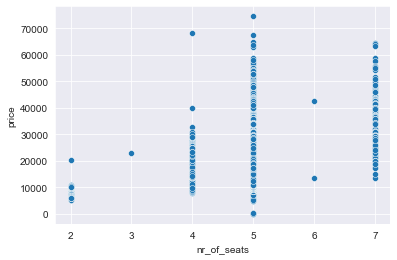

In [301]:
sns.scatterplot(x="nr_of_seats", y="price", data=df)

### gearing_type column

In [128]:
df.gearing_type.value_counts(dropna=False)

Manual            7672
Automatic         6903
Semi-automatic     467
Name: gearing_type, dtype: int64

<AxesSubplot:xlabel='gearing_type', ylabel='price'>

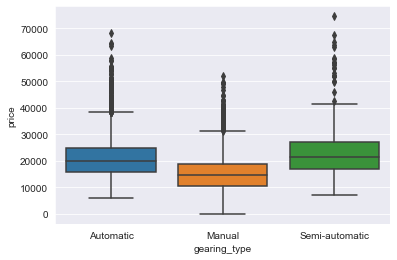

In [302]:
sns.boxplot(x="gearing_type", y="price", data=df)

### displacement_cc column

In [129]:
df.displacement_cc.value_counts(dropna=False)

1598.0    4524
999.0     2383
1398.0    1288
1399.0     680
1229.0     673
          ... 
122.0        1
1198.0       1
1195.0       1
2967.0       1
1800.0       1
Name: displacement_cc, Length: 78, dtype: int64

In [130]:
df.displacement_cc.isnull().sum()

397

In [131]:
df.short_description

0              Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                           1.8 TFSI sport
2        Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                                  1.4 TDi Design S tronic
4        Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
                               ...                        
15037                Blue dCi 200CV EDC Executive 4Control
15038                  TCe 225 EDC GPF LIM Deluxe Pano,RFK
15039    Blue dCi 200 EDC Initiale Paris Leder LED Navi...
15040    Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...
15041          INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
Name: short_description, Length: 15042, dtype: object

In [132]:
df.short_description[df.displacement_cc.isnull()]

141      1.6 TDI METAL PLUS *S-TRONIC* BI-COLOR*NAVI_ X...
190        Sportback Sportback 1.4 TDI S tronic Adrenalin2
352       SPB 1.4TDI SPORT S-TRONIC NAVI XENON PADDLES PDC
360                            SPB 1.6 TDI 116 CV S tronic
450           Sportback Sportback 1.0 TFSI 95CV Attraction
                               ...                        
14913                       INITIALE PARIS 225 TCE GPF EDC
14918                          V dCi 160 Energy Twin Turbo
14930                      Initiale Paris Blue dCi 200 EDC
14931    Init. P. Blue dCi 147kW (200CV) EDC - 18 Leomotor
15029                     V Tce 225 EDC FAP Initiale Paris
Name: short_description, Length: 397, dtype: object

In [133]:
df.short_description[df.displacement_cc.isnull()].str.extract("(\d\.\d)")

,0
141,1.6
190,1.4
352,1.4
360,1.6
450,1.0
...,...
14913,NaN
14918,NaN
14930,NaN
14931,NaN


In [134]:
df.short_description[df.displacement_cc.isnull()].str.extract("(\d\.\d)").isnull().sum()

0    159
dtype: int64

In [135]:
df["fill_displacement"] = df["short_description"].str.extract("(\d\.\d)").astype(float)*1000
df["fill_displacement"]

0        1400.0
1        1800.0
2        1600.0
3        1400.0
4        1400.0
          ...  
15037       NaN
15038       NaN
15039       NaN
15040       NaN
15041       NaN
Name: fill_displacement, Length: 15042, dtype: float64

In [136]:
df.displacement_cc.fillna(df["fill_displacement"], inplace=True)

In [137]:
df.displacement_cc.isnull().sum()

159

In [138]:
def displacement_category(x):
    if x % 100 >= 50 :
        return x + 100 - x % 100
    elif x % 100 < 50 :
        return x - x % 100
    else :
        return x
    
#df.displacement_cc.round(-2)

In [139]:
df["displacement_cc"] = df.displacement_cc.apply(displacement_category)
df["displacement_cc"]

0        1400.0
1        1800.0
2        1600.0
3        1400.0
4        1400.0
          ...  
15037    2000.0
15038    1800.0
15039    2000.0
15040    2000.0
15041    1800.0
Name: displacement_cc, Length: 15042, dtype: float64

In [140]:
df["displacement_cc"].isnull().sum()

159

In [141]:
# df.fill_displacement düşülecek

In [142]:
df.groupby(["make_model", "body_type"])["displacement_cc"].value_counts(dropna=False)

make_model      body_type  displacement_cc
Audi A1         Compact    1000.0             654
                           1400.0             208
                           1600.0              72
                           1500.0              14
                           2000.0               8
                                             ... 
Renault Espace  Van        1600.0             447
                           1800.0             166
                           2000.0              92
                           NaN                 42
                           200.0                1
Name: displacement_cc, Length: 198, dtype: int64

In [143]:
df.groupby(["make_model", "body_type"])["displacement_cc"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0])).isnull().sum()

0

In [144]:
df["displacement_cc"] = df.groupby(["make_model", "body_type"])["displacement_cc"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

In [145]:
df["displacement_cc"].isnull().sum()

0

In [146]:
df["displacement_cc"].value_counts()

1600.0     5004
1400.0     2912
1000.0     2525
1500.0     1370
2000.0     1163
1200.0     1139
900.0       376
1100.0      261
1800.0      203
0.0          38
2500.0       20
1300.0       12
100.0         7
1700.0        3
1900.0        2
15900.0       1
2800.0        1
9800.0        1
3000.0        1
16000.0       1
300.0         1
200.0         1
Name: displacement_cc, dtype: int64

In [147]:
df.displacement_cc.dtype

dtype('float64')

In [148]:
df.drop(columns="fill_displacement", inplace=True)

<AxesSubplot:xlabel='displacement_cc', ylabel='price'>

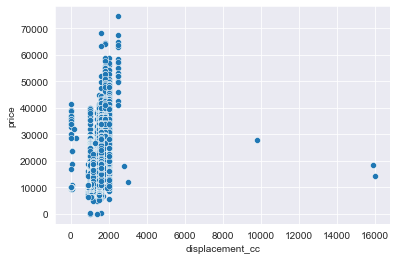

In [303]:
sns.scatterplot(x="displacement_cc", y="price", data=df)

### cylinders column

In [149]:
df.cylinders.value_counts(dropna=False)

4.0    7681
NaN    5265
3.0    2066
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [150]:
df.groupby(["make_model", "body_type", "displacement_cc"])["cylinders"].value_counts(dropna=False).head(50)

make_model  body_type      displacement_cc  cylinders
Audi A1     Compact        300.0            NaN            1
                           900.0            NaN            5
                           1000.0           3.0          377
                                            NaN          274
                                            4.0            4
                                            8.0            1
                           1400.0           NaN           99
                                            3.0           64
                                            4.0           45
                           1500.0           4.0           12
                                            NaN            2
                           1600.0           4.0           41
                                            NaN           30
                                            3.0            1
                           1800.0           4.0            2
                           2000

In [151]:
df.groupby(["make_model", "body_type", "displacement_cc"])["cylinders"].value_counts(dropna=False).head(50) 

make_model  body_type      displacement_cc  cylinders
Audi A1     Compact        300.0            NaN            1
                           900.0            NaN            5
                           1000.0           3.0          377
                                            NaN          274
                                            4.0            4
                                            8.0            1
                           1400.0           NaN           99
                                            3.0           64
                                            4.0           45
                           1500.0           4.0           12
                                            NaN            2
                           1600.0           4.0           41
                                            NaN           30
                                            3.0            1
                           1800.0           4.0            2
                           2000

In [152]:
df.groupby("cylinders")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
1.0,1.0,16625.000000,NaN,16625.0,16625.0,16625.0,16625.0,16625.0
2.0,2.0,34745.000000,18165.573209,21900.0,28322.5,34745.0,41167.5,47590.0
3.0,2066.0,18709.449661,5282.030160,120.0,14950.0,18117.5,22790.0,41495.0
4.0,7681.0,18202.195157,7821.710180,13.0,12250.0,17390.0,22100.0,68320.0
5.0,22.0,51626.318182,14479.822024,10000.0,49925.0,52500.0,58225.0,74600.0
6.0,3.0,17000.000000,8231.038817,12000.0,12250.0,12500.0,19500.0,26500.0
8.0,2.0,18990.000000,8485.281374,12990.0,15990.0,18990.0,21990.0,24990.0


In [153]:
df["cylinders"] = df.groupby(["make_model", "body_type", "displacement_cc"])["cylinders"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.cylinders.mode()[0]))

In [154]:
df["cylinders"].isnull().sum()

0

In [155]:
df.groupby("cylinders")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
1.0,1.0,16625.000000,NaN,16625.0,16625.00,16625.0,16625.00,16625.0
2.0,2.0,34745.000000,18165.573209,21900.0,28322.50,34745.0,41167.50,47590.0
3.0,3362.0,18291.987210,5181.650094,120.0,14490.00,17500.0,22289.75,41495.0
4.0,11650.0,17995.496052,7794.407544,13.0,12191.25,16879.5,21900.00,68320.0
5.0,22.0,51626.318182,14479.822024,10000.0,49925.00,52500.0,58225.00,74600.0
6.0,3.0,17000.000000,8231.038817,12000.0,12250.00,12500.0,19500.00,26500.0
8.0,2.0,18990.000000,8485.281374,12990.0,15990.00,18990.0,21990.00,24990.0


In [156]:
df.cylinders.value_counts(dropna=False)

4.0    11650
3.0     3362
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [157]:
df.cylinders.dtype

dtype('float64')

<AxesSubplot:xlabel='cylinders', ylabel='price'>

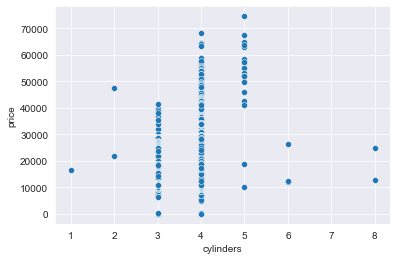

In [304]:
sns.scatterplot(x="cylinders", y="price", data=df)

### drive_chain column

In [158]:
df.drive_chain.value_counts(dropna=False)

front    8400
NaN      6486
4WD       152
rear        4
Name: drive_chain, dtype: int64

In [159]:
df.groupby(["make_model", "body_type"])["drive_chain"].value_counts(dropna=False)

make_model      body_type    drive_chain
Audi A1         Compact      front          664
                             NaN            301
                             4WD              2
                Coupe        NaN              2
                Other        front           12
                                           ... 
Renault Espace  Transporter  front            6
                             4WD              1
                Van          front          369
                             NaN            356
                             4WD             23
Name: drive_chain, Length: 107, dtype: int64

In [160]:
df.groupby("drive_chain")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
drive_chain,,,,,,,,
4WD,152.0,30774.486842,13388.224684,9680.0,17990.0,33175.0,37460.0,74600.0
front,8400.0,18743.483095,7061.523492,4990.0,13899.0,17950.0,22700.0,68320.0
rear,4.0,15332.500000,4313.949273,10490.0,12297.5,15925.0,18960.0,18990.0


In [161]:
df["drive_chain"] = df.groupby(["make_model", "body_type"])["drive_chain"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.drive_chain.mode()[0]))

In [162]:
df.groupby("drive_chain")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
drive_chain,,,,,,,,
4WD,185.0,27773.989189,13833.332897,9680.0,14950.0,24990.0,36950.0,74600.0
front,14853.0,17993.438767,7226.719860,13.0,12900.0,16949.0,21900.0,68320.0
rear,4.0,15332.500000,4313.949273,10490.0,12297.5,15925.0,18960.0,18990.0


In [163]:
df.drive_chain.isnull().sum()

0

<AxesSubplot:xlabel='drive_chain', ylabel='price'>

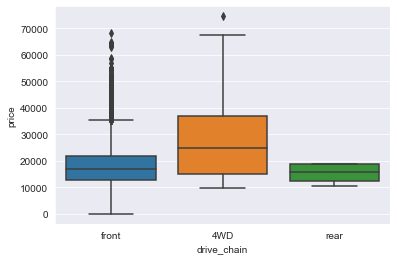

In [305]:
sns.boxplot(x="drive_chain", y="price", data=df)

### fuel column

In [164]:
df.fuel.value_counts(dropna=False)

Benzine     8118
Diesel      6858
LPG/CNG       61
Electric       5
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='price'>

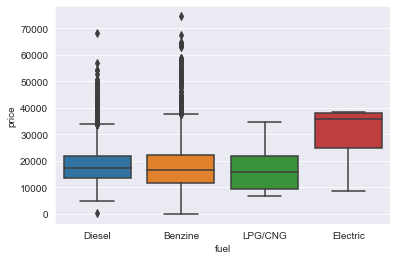

In [307]:
sns.boxplot(x="fuel", y="price", data=df)

### co_2_emission column

In [165]:
df.co_2_emission.value_counts(dropna=False)

NaN       2307
120.0      666
99.0       537
97.0       512
102.0      471
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: co_2_emission, Length: 123, dtype: int64

In [166]:
df.co_2_emission.isnull().sum()

2307

In [167]:
df.next_inspection.value_counts(dropna=False)

NaN                                                                  11606
04/2022                                                                 62
06/2021                                                                 47
03/2021                                                                 39
03/2022                                                                 36
                                                                     ...  
04/20214.7 l/100 km (comb)5.8 l/100 km (city)4 l/100 km (country)        1
05/2020139 g CO2/km (comb)                                               1
08/2020Euro 6                                                            1
12/2020126 g CO2/km (comb)                                               1
01/2022168 g CO2/km (comb)                                               1
Name: next_inspection, Length: 1385, dtype: int64

In [168]:
df["next_inspection"].str.extract("\d+/\d{0,4}(.+)\sg").astype(float).notna().sum()

0    2254
dtype: int64

In [169]:
df["fill_co2_insp_new"] = df["next_inspection"].str.extract("\d+/\d{0,4}(.+)\sg").astype(float)

In [170]:
df.co_2_emission.fillna(df["fill_co2_insp_new"], inplace=True)

In [171]:
df[df.co_2_emission.isnull()]["fill_co2_insp_new"].notna().sum()

0

In [172]:
# next_inspection hasn't got data about co_2_emission nulls.

In [173]:
df.drop(columns="fill_co2_insp_new", inplace=True)

In [174]:
df.inspection_new.value_counts(dropna=False)

NaN                                                                11231
YesEuro 6                                                            519
Yes                                                                  427
Yes102 g CO2/km (comb)                                               174
Yes4 (Green)                                                         166
                                                                   ...  
Yes100 g CO2/km (comb)                                                 1
Yes4.9 l/100 km (comb)5.9 l/100 km (city)4.3 l/100 km (country)        1
Yes5.1 l/100 km (comb)6.4 l/100 km (city)4.3 l/100 km (country)        1
Yes6.3 l/100 km (comb)                                                 1
Yes172 g CO2/km (comb)                                                 1
Name: inspection_new, Length: 202, dtype: int64

In [175]:
df["inspection_new"].str.extract("Yes(.+)\sg")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,109
...,...
15037,NaN
15038,NaN
15039,NaN
15040,NaN


In [176]:
df["fill_co2_other"] = df["inspection_new"].str.extract("Yes(.+)\sg")

In [177]:
df[df.co_2_emission.isnull()]["fill_co2_other"].notna().sum()

0

In [178]:
# inspection_new hasn't got data about co_2_emission nulls.

In [179]:
df.previous_owners.value_counts(dropna=False)

1                                                                7786
NaN                                                              6208
2                                                                 639
0                                                                 162
3                                                                  17
                                                                 ... 
1111 g CO2/km (comb)                                                1
1Euro 6                                                             1
2119 g CO2/km (comb)                                                1
16.6 l/100 km (comb)8.1 l/100 km (city)5.7 l/100 km (country)       1
1142 g CO2/km (comb)                                                1
Name: previous_owners, Length: 102, dtype: int64

In [180]:
df["previous_owners"].str.extract("\d(.+)\sg")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15037,NaN
15038,NaN
15039,139
15040,NaN


In [181]:
df["fill_co2_other"] = df["previous_owners"].str.extract("\d(.+)\sg")

In [182]:
df[df.co_2_emission.isnull()]["fill_co2_other"].notna().sum()

0

In [183]:
# previous owners hasn't got data about co_2_emission nulls.

In [184]:
df.warranty.value_counts(dropna=False)

NaN                                                                    6314
Euro 6                                                                 1830
12 months                                                              1078
24 months                                                               556
4 (Green)                                                               516
                                                                       ... 
2 months                                                                  1
72 months125 g CO2/km (comb)                                              1
60 months14 g CO2/km (comb)                                               1
24 months121 g CO2/km (comb)                                              1
36 months7.4 l/100 km (comb)9.6 l/100 km (city)6 l/100 km (country)       1
Name: warranty, Length: 506, dtype: int64

In [185]:
df["fill_co2_other"] = df["warranty"].str.extract("months(.+)\sg")

In [186]:
df[df.co_2_emission.isnull()]["fill_co2_other"].notna().sum()

0

In [187]:
# warranty hasn't got data about co_2_emission nulls.

In [188]:
df.full_service.value_counts(dropna=False)

NaN                                                             9190
4 (Green)                                                       2172
Euro 6                                                          2087
Euro 6d-TEMP                                                     381
120 g CO2/km (comb)                                               67
                                                                ... 
84 g CO2/km (comb)                                                 1
87 g CO2/km (comb)                                                 1
5.4 l/100 km (comb)                                                1
5.7 l/100 km (comb)7.3 l/100 km (city)4.9 l/100 km (country)       1
Euro 4                                                             1
Name: full_service, Length: 121, dtype: int64

In [189]:
df["fill_co2_other"] = df["full_service"].str.extract("(.+)\sg")

In [190]:
df[df.co_2_emission.isnull()]["fill_co2_other"].notna().sum()

1

In [191]:
# full_service has only 1 data about co_2_emission nulls.

In [192]:
df.non_smoking_vehicle.value_counts(dropna=False)

NaN                                                             12019
4 (Green)                                                        1237
Euro 6                                                            845
Euro 6d-TEMP                                                      345
120 g CO2/km (comb)                                                37
                                                                ...  
6.2 l/100 km (comb)7.9 l/100 km (city)5.3 l/100 km (country)        1
91 g CO2/km (comb)                                                  1
6.5 l/100 km (comb)8.5 l/100 km (city)5.4 l/100 km (country)        1
5.7 l/100 km (comb)7.3 l/100 km (city)4.7 l/100 km (country)        1
175 g CO2/km (comb)                                                 1
Name: non_smoking_vehicle, Length: 93, dtype: int64

In [193]:
df["fill_co2_other"] = df["non_smoking_vehicle"].str.extract("(.+)\sg")

In [194]:
df[df.co_2_emission.isnull()]["fill_co2_other"].notna().sum()

0

In [195]:
#non smoking hasn't got data about co_2_emission nulls.

In [196]:
df.drop(columns="fill_co2_other", inplace=True)

In [197]:
df.groupby(["make_model", "fuel", "age"])["co_2_emission"].describe().head(50)

count        mean          std    min    25%  \
make_model    fuel     age                                                 
Audi A1       Benzine  0.0  656.0  109.312500     5.619614   97.0  108.0   
                       1.0  378.0  103.185185     6.940642   97.0   98.0   
                       2.0  204.0  103.803922     8.365469   97.0   97.0   
                       3.0  291.0  103.996564    15.274838   97.0   97.0   
              Diesel   0.0    3.0   97.666667     0.577350   97.0   97.5   
                       1.0  293.0  102.017065     4.256709   89.0   99.0   
                       2.0  136.0   99.117647     3.938525   90.0   97.0   
                       3.0  224.0   98.705357     4.520285   90.0   97.0   
Audi A2       Diesel   1.0    0.0         NaN          NaN    NaN    NaN   
Audi A3       Benzine  0.0  409.0  117.078240     7.344048  103.0  114.0   
                       1.0  133.0  117.819549    23.490435   99.0  107.0   
                       2.0  127.0  111.015748    14.744913   96.0  105.0   
                       3.0   71.0  117.169014    14.144142  103.0  110.5   
              Diesel   0.0  270.0  108.114815     6.795319   99.0  103.0   
                       1.0  556.0  109.588129    55.224826   99.0  103.0   
                       2.0  452.0  105.900442     5.784857   88.0  103.0   
                       3.0  556.0  104.190647     8.064581   85.0   99.0   
              Electric 1.0    3.0   36.000000     0.000000   36.0   36.0   
                       3.0    0.0         NaN          NaN    NaN    NaN   
              LPG/CNG  0.0    8.0  104.000000    10.796825   95.0   96.5   
                       2.0    6.0   91.000000     0.000000   91.0   91.0   
                       3.0   16.0   95.750000     7.252586   91.0   94.0   
Opel Astra    Benzine  0.0  470.0  127.091489    17.027825    0.0  114.0   
                       1.0  414.0  149.328502   588.228101   96.0  115.0   
                       2.0  107.0  115.056075    12.017936   99.0  102.0   
                       3.0   92.0  255.673913  1247.228938   96.0  104.0   
              Diesel   0.0   63.0  119.984127    17.606352    5.0  115.5   
                       1.0  204.0  109.176471    11.996232   88.0   97.0   
                       2.0  296.0  102.097973    11.576739   88.0   93.0   
                       3.0  308.0  104.970779    11.591126   87.0   95.0   
              LPG/CNG  0.0    1.0  113.000000          NaN  113.0  113.0   
                       2.0    0.0         NaN          NaN    NaN    NaN   
Opel Corsa    Benzine  0.0  656.0  136.817073     9.527946  107.0  129.0   
                       1.0  589.0  127.057725    12.033262   51.0  120.0   
                       2.0  301.0  123.963455     7.448624  104.0  120.0   
                       3.0  274.0  169.846715   736.990324  105.0  121.0   
              Diesel   0.0    2.0  101.000000     0.000000  101.0  101.0   
                       1.0    2.0  106.000000     1.414214  105.0  105.5   
                       2.0   15.0  100.733333     5.364788   84.0  100.0   
                       3.0   63.0   98.825397     9.960470   82.0   92.0   
              LPG/CNG  0.0    4.0  116.750000     7.500000  113.0  113.0   
                       1.0    2.0  113.000000     0.000000  113.0  113.0   
                       2.0    3.0  124.000000    11.000000  113.0  118.5   
                       3.0    3.0  115.666667     7.371115  110.0  111.5   
Opel Insignia Benzine  0.0  298.0  143.912752    14.347272   45.0  136.0   
                       1.0  319.0  225.579937  1113.494219  119.0  133.0   
                       2.0   81.0  144.814815    16.774319  124.0  133.0   
                       3.0   45.0  139.311111    23.036357  124.0  129.0   
              Diesel   0.0  210.0  146.800000    23.925482    5.0  136.0   
                       1.0  311.0  136.543408    15.100861    5.0  127.5   

                              50%     75%      max  
make_model    fuel    

In [198]:
#grouping by make_model, fuel, age and fill co_2_emission nulls with median
df["co_2_emission"] = df.groupby(["make_model", "fuel", "age"])["co_2_emission"].apply(lambda x : x.fillna(x.median()))

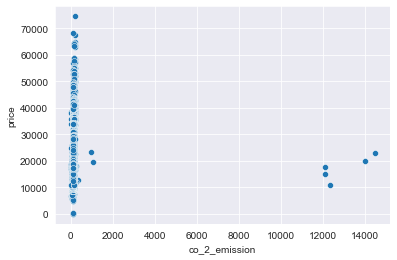

In [199]:
sns.scatterplot(x = df.co_2_emission, y = df.price);

In [200]:
df["co_2_emission"].describe()

count    15038.000000
mean       122.349448
std        236.328383
min          0.000000
25%        104.000000
50%        117.000000
75%        129.000000
max      14457.000000
Name: co_2_emission, dtype: float64

In [201]:
df["co_2_emission"].isnull().sum()

4

In [202]:
df[df["co_2_emission"].isnull()]

,make_model,short_description,body_type,price,km,prev_owner,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,body_color,paint_type,nr_of_doors,nr_of_seats,gearing_type,displacement_cc,cylinders,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,emission_label,gears,hp_kw,insp_new,warranty_month,upholstery_type,upholstery_color,weight_kg,consumption_comb,consumption_city,consumption_country,age
2490,Audi A2,"30 TDI Navi, Lane assist, Sitzheizung, Einpark...",Off-Road,28200.0,26166.0,1.0,Employee's car,1,10/2019Euro 6,NaN,4 (Green),NaN,NaN,Grey,Metallic,5.0,5.0,Manual,1600.0,4.0,front,Diesel,NaN,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",4 (Green),NaN,85.0,Yes,12.0,Cloth,Black,NaN,4.9,5.6,4.5,1.0
3182,Audi A3,S-Line e-tron 1.4,Compact,24950.0,57000.0,1.0,Used,1,NaN,NaN,NaN,Euro 6,NaN,Blue,Metallic,5.0,5.0,Semi-automatic,1400.0,4.0,front,Electric,NaN,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",NaN,6.0,150.0,No,12.0,Part leather,Black,NaN,NaN,NaN,NaN,3.0
6428,Opel Astra,"K 1,4 CNG 5-tg Exclusive + WR",Sedans,12864.0,120000.0,1.0,Used,1,08/20204 (Green),NaN,NaN,NaN,NaN,Brown,Metallic,5.0,5.0,Manual,1400.0,4.0,front,LPG/CNG,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive headlights,Central door lock,Cent...",4 (Green),6.0,81.0,No,12.0,Cloth,Black,NaN,NaN,NaN,NaN,2.0
12750,Renault Clio,zoé life,Sedans,8490.0,23863.0,1.0,Used,NaN,NaN,NaN,NaN,NaN,NaN,White,Metallic,5.0,5.0,Automatic,1500.0,4.0,front,Electric,NaN,NaN,"Air conditioning,Cruise control,Navigation system",On-board computer,NaN,Driver-side airbag,NaN,NaN,NaN,No,12.0,NaN,Black,NaN,NaN,NaN,NaN,3.0


In [203]:
df["co_2_emission"].fillna(df["co_2_emission"].median(), inplace=True)

In [204]:
df["co_2_emission"].isnull().sum()

0

### emission_class column

In [205]:
df.emission_class.value_counts(dropna=False)

Euro 6          9543
NaN             3428
Euro 6d-TEMP    1764
Euro 6c          127
Euro 5            78
Euro 6d           62
Euro 4            40
Name: emission_class, dtype: int64

In [206]:
df.emission_class

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15037             NaN
15038             NaN
15039    Euro 6d-TEMP
15040          Euro 6
15041          Euro 6
Name: emission_class, Length: 15042, dtype: object

In [207]:
def null_check (col) :
    print("Column name :", col)
    print("--"*30)
    print("Number of nulls :", df[col].isnull().sum())
    print("Percent of nulls :", '%', round((df[col].isnull().sum()/df.shape[0])*100, 2))
    print("Value_counts :", "\n", df[col].value_counts(dropna=False))

In [208]:
def check_other_column_values(row) :
    if any(i in str(row) for i in col_list) :
        return True
    else :
        False

def find_easy(col_main, col_other, pattern) :
    global col_list
    col_list = list(df[col_main].dropna().unique())
    if df[col_other].apply(check_other_column_values).isnull().sum() > 0 :
        df["find"] = df[col_other].str.extract(pattern)
        x_sum =df[df[col_main].isnull()]["find"].notna().sum()
        if x_sum > 0 :
            return f"{col_other} has {x_sum} values. You can fill {col_main} with them."
        else :
            return f"There ins't any useful information in {col_other} to fill {col_main}."

In [209]:
df.next_inspection.value_counts()

04/2022                                                                62
06/2021                                                                47
03/2021                                                                39
03/2022                                                                36
01/2022                                                                32
                                                                       ..
11/2018117 g CO2/km (comb)                                              1
01/2021117 g CO2/km (comb)                                              1
07/201999 g CO2/km (comb)                                               1
03/20214.4 l/100 km (comb)5.4 l/100 km (city)3.9 l/100 km (country)     1
01/2022168 g CO2/km (comb)                                              1
Name: next_inspection, Length: 1384, dtype: int64

In [210]:
find_easy("emission_class","next_inspection", "(E.+)")

"There ins't any useful information in next_inspection to fill emission_class."

In [211]:
df.inspection_new.value_counts()

YesEuro 6                                                          519
Yes                                                                427
Yes102 g CO2/km (comb)                                             174
Yes4 (Green)                                                       166
YesEuro 6d-TEMP                                                    130
                                                                  ... 
Yes100 g CO2/km (comb)                                               1
Yes4.9 l/100 km (comb)5.9 l/100 km (city)4.3 l/100 km (country)      1
Yes5.1 l/100 km (comb)6.4 l/100 km (city)4.3 l/100 km (country)      1
Yes6.3 l/100 km (comb)                                               1
Yes172 g CO2/km (comb)                                               1
Name: inspection_new, Length: 201, dtype: int64

In [212]:
find_easy("emission_class","inspection_new", "(E.+)")

'inspection_new has 18 values. You can fill emission_class with them.'

In [213]:
df.previous_owners.value_counts()

1                                                                7786
2                                                                 639
0                                                                 162
3                                                                  17
1168 g CO2/km (comb)                                               13
                                                                 ... 
1111 g CO2/km (comb)                                                1
1Euro 6                                                             1
2119 g CO2/km (comb)                                                1
16.6 l/100 km (comb)8.1 l/100 km (city)5.7 l/100 km (country)       1
1142 g CO2/km (comb)                                                1
Name: previous_owners, Length: 101, dtype: int64

In [214]:
find_easy("emission_class","previous_owners", "(E.+)")

"There ins't any useful information in previous_owners to fill emission_class."

In [215]:
df.warranty.value_counts()

Euro 6                                                                 1830
12 months                                                              1078
24 months                                                               556
4 (Green)                                                               516
12 monthsEuro 6                                                         403
                                                                       ... 
2 months                                                                  1
72 months125 g CO2/km (comb)                                              1
60 months14 g CO2/km (comb)                                               1
24 months121 g CO2/km (comb)                                              1
36 months7.4 l/100 km (comb)9.6 l/100 km (city)6 l/100 km (country)       1
Name: warranty, Length: 505, dtype: int64

In [216]:
find_easy("emission_class","warranty", "(E.+)")

'warranty has 125 values. You can fill emission_class with them.'

In [217]:
df.full_service.value_counts()

4 (Green)                                                       2172
Euro 6                                                          2087
Euro 6d-TEMP                                                     381
120 g CO2/km (comb)                                               67
99 g CO2/km (comb)                                                60
                                                                ... 
84 g CO2/km (comb)                                                 1
87 g CO2/km (comb)                                                 1
5.4 l/100 km (comb)                                                1
5.7 l/100 km (comb)7.3 l/100 km (city)4.9 l/100 km (country)       1
Euro 4                                                             1
Name: full_service, Length: 120, dtype: int64

In [218]:
find_easy("emission_class","full_service", "(E.+)")

'full_service has 430 values. You can fill emission_class with them.'

In [219]:
df.non_smoking_vehicle.value_counts()

4 (Green)                                                       1237
Euro 6                                                           845
Euro 6d-TEMP                                                     345
120 g CO2/km (comb)                                               37
107 g CO2/km (comb)                                               36
                                                                ... 
158 g CO2/km (comb)                                                1
150 g CO2/km (comb)                                                1
6.2 l/100 km (comb)7.9 l/100 km (city)5.3 l/100 km (country)       1
6.5 l/100 km (comb)8.5 l/100 km (city)5.4 l/100 km (country)       1
175 g CO2/km (comb)                                                1
Name: non_smoking_vehicle, Length: 92, dtype: int64

In [220]:
find_easy("emission_class","non_smoking_vehicle", "(E.+)")

'non_smoking_vehicle has 120 values. You can fill emission_class with them.'

In [221]:
# We did the checks. Since the values are very close to the mode, we filled it according to the mode.

In [222]:
df.groupby(["make_model", "fuel"]).emission_class.describe()

count unique     top  freq
make_model     fuel                               
Audi A1        Benzine   1291      5  Euro 6  1025
               Diesel     653      3  Euro 6   646
Audi A2        Diesel       1      1  Euro 6     1
Audi A3        Benzine    671      3  Euro 6   474
               Diesel    1787      5  Euro 6  1688
               Electric     4      1  Euro 6     4
               LPG/CNG     29      2  Euro 6    25
Opel Astra     Benzine    892      5  Euro 6   643
               Diesel     870      4  Euro 6   774
               LPG/CNG      1      1  Euro 6     1
Opel Corsa     Benzine   1610      6  Euro 6  1104
               Diesel      83      2  Euro 6    81
               LPG/CNG     12      3  Euro 6     6
Opel Insignia  Benzine    623      5  Euro 6   412
               Diesel    1240      6  Euro 6  1057
Renault Clio   Benzine    769      6  Euro 6   668
               Diesel     410      5  Euro 6   384
               Electric     0      0     NaN   NaN
               LPG/CNG      8      1  Euro 6     8
Renault Duster Benzine     32      1  Euro 4    32
Renault Espace Benzine    182      5  Euro 6   150
               Diesel     446      5  Euro 6   392

In [223]:
df["emission_class"] = df.groupby(["make_model", "fuel"]).emission_class.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.emission_class.mode()[0]))

In [224]:
df.groupby(["make_model", "fuel"]).emission_class.describe()

count unique     top  freq
make_model     fuel                               
Audi A1        Benzine   1762      5  Euro 6  1496
               Diesel     728      3  Euro 6   721
Audi A2        Diesel       1      1  Euro 6     1
Audi A3        Benzine    866      3  Euro 6   669
               Diesel    2041      5  Euro 6  1942
               Electric     4      1  Euro 6     4
               LPG/CNG     33      2  Euro 6    29
Opel Astra     Benzine   1314      5  Euro 6  1065
               Diesel    1064      4  Euro 6   968
               LPG/CNG      2      1  Euro 6     2
Opel Corsa     Benzine   2024      6  Euro 6  1518
               Diesel     117      2  Euro 6   115
               LPG/CNG     13      3  Euro 6     7
Opel Insignia  Benzine    841      5  Euro 6   630
               Diesel    1638      6  Euro 6  1455
Renault Clio   Benzine   1039      6  Euro 6   938
               Diesel     596      5  Euro 6   570
               Electric     1      1  Euro 6     1
               LPG/CNG     13      1  Euro 6    13
Renault Duster Benzine     34      1  Euro 4    34
Renault Espace Benzine    238      5  Euro 6   206
               Diesel     673      5  Euro 6   619

In [225]:
df.emission_class.value_counts(dropna=False)

Euro 6          12969
Euro 6d-TEMP     1764
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [226]:
df.drop(columns="find", inplace=True)

### comfort_convenience column

In [227]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  808
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   214
Air conditioning,Elect

In [228]:
df.groupby(["make_model", "body_type", "age"]).comfort_convenience.describe()

count unique  \
make_model     body_type   age                
Audi A1        Compact     0.0   337    123   
                           1.0   259    124   
                           2.0   129     85   
                           3.0   203    164   
               Coupe       2.0     1      1   
...                              ...    ...   
Renault Espace Transporter 3.0    35     20   
               Van         0.0   211    126   
                           1.0   191    136   
                           2.0    99     84   
                           3.0   189    165   

                                                                              top  \
make_model     body_type   age                                                      
Audi A1        Compact     0.0  Air conditioning,Armrest,Automatic climate con...   
                           1.0  Air conditioning,Armrest,Automatic climate con...   
                           2.0  Air conditioning,Armrest,Automatic climate con...   
                           3.0  Air conditioning,Electrical side mirrors,Hill ...   
               Coupe       2.0  Air conditioning,Air suspension,Armrest,Auxili...   
...                                                                           ...   
Renault Espace Transporter 3.0  Air conditioning,Cruise control,Electrically a...   
               Van         0.0  Air conditioning,Automatic climate control,Cru...   
                           1.0  Air conditioning,Automatic climate control,Cru...   
                           2.0                       Cruise control,Power windows   
                           3.0                                     Cruise control   

                               freq  
make_model     body_type   age       
Audi A1        Compact     0.0   24  
                           1.0   39  
                           2.0    6  
                           3.0    5  
               Coupe       2.0    1  
...                             ...  
Renault Espace Transporter 3.0    7  
               Van         0.0    9  
                           1.0   10  
                           2.0    6  
                           3.0   10  

[153 rows x 4 columns]

In [229]:
df.groupby(["make_model", "body_type", "age"]).comfort_convenience.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0])).isnull().sum()

0

In [230]:
df["comfort_convenience"] = df.groupby(["make_model", "body_type", "age"]).comfort_convenience.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.comfort_convenience.mode()[0]))

In [231]:
df["comfort_convenience"].isnull().sum()

0

### entertainment_media column

In [232]:
df.entertainment_media.value_counts(dropna=False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                     1246
NaN                                                                                            1204
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                  969
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                        769
Radio                                                                                           461
                                                                                               ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,On-board computer,Radio,Sound system       1
Bluetooth,Sound system,USB                                                                        1
CD player,Digital radio,Radio                                                                     1
Bluetooth,CD player,Digital radio,Hands-free equipment                                            1


In [233]:
df.groupby(["make_model", "body_type", "age"]).entertainment_media.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0])).isnull().sum()

0

In [234]:
df["entertainment_media"] = df.groupby(["make_model", "body_type", "age"]).entertainment_media.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.entertainment_media.mode()[0]))

In [235]:
df["entertainment_media"].isnull().sum()

0

### extras column

In [236]:
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                               2977
NaN                                                                                                        2733
Alloy wheels,Touch screen                                                                                   656
Alloy wheels,Voice Control                                                                                  548
Alloy wheels,Touch screen,Voice Control                                                                     516
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [237]:
df.groupby(["make_model", "body_type", "age"]).extras.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.extras.mode()[0])).isnull().sum()

0

In [238]:
df["extras"] = df.groupby(["make_model", "body_type", "age"]).extras.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.extras.mode()[0]))

In [239]:
df.extras.isnull().sum()

0

### safety_security column

In [240]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               850
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      502
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [241]:
df.groupby(["make_model", "body_type", "age"]).safety_security.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0])).isnull().sum()

0

In [242]:
df["safety_security"] = df.groupby(["make_model", "body_type", "age"]).safety_security.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.safety_security.mode()[0]))

### emission_label column

In [243]:
df.emission_label.value_counts(dropna=False)

NaN               11411
4 (Green)          3263
1 (No sticker)      357
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [244]:
#This column will be dropped because we filled many columns related to emission and it has 75% null.
df.drop(columns="emission_label", inplace=True)

### gears column

In [245]:
df.gears.value_counts(dropna=False)

6.0     5490
NaN     4340
5.0     3138
7.0     1844
8.0      216
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [246]:
df.groupby(["make_model", "gearing_type"])["gears"].value_counts(dropna=False)

make_model      gearing_type    gears
Audi A1         Automatic       7.0      583
                                NaN      463
                                6.0       18
                                5.0       17
                                8.0        2
                                        ... 
Renault Espace  Manual          NaN       17
                                7.0        2
                Semi-automatic  6.0       34
                                NaN        4
                                7.0        1
Name: gears, Length: 80, dtype: int64

In [247]:
df.groupby(["make_model", "body_type","gearing_type"])["gears"].describe()

count      mean       std  min  \
make_model     body_type   gearing_type                                     
Audi A1        Compact     Automatic       208.0  6.947115  0.298290  5.0   
                           Manual          335.0  5.194030  0.396044  5.0   
                           Semi-automatic    3.0  7.000000  0.000000  7.0   
               Coupe       Manual            1.0  5.000000       NaN  5.0   
               Other       Automatic         3.0  7.000000  0.000000  7.0   
...                                          ...       ...       ...  ...   
Renault Espace Transporter Manual            7.0  6.000000  0.000000  6.0   
                           Semi-automatic   22.0  6.000000  0.000000  6.0   
               Van         Automatic       389.0  6.272494  0.619934  3.0   
                           Manual           50.0  6.020000  0.141421  6.0   
                           Semi-automatic   12.0  6.083333  0.288675  6.0   

                                           25%  50%  75%  max  
make_model     body_type   gearing_type                        
Audi A1        Compact     Automatic       7.0  7.0  7.0  8.0  
                           Manual          5.0  5.0  5.0  6.0  
                           Semi-automatic  7.0  7.0  7.0  7.0  
               Coupe       Manual          5.0  5.0  5.0  5.0  
               Other       Automatic       7.0  7.0  7.0  7.0  
...                                        ...  ...  ...  ...  
Renault Espace Transporter Manual          6.0  6.0  6.0  6.0  
                           Semi-automatic  6.0  6.0  6.0  6.0  
               Van         Automatic       6.0  6.0  7.0  9.0  
                           Manual          6.0  6.0  6.0  7.0  
                           Semi-automatic  6.0  6.0  6.0  7.0  

[103 rows x 8 columns]

In [248]:
df.groupby(["make_model","body_type", "gearing_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.gears.mode()[0])).isnull().sum()

0

In [249]:
df["gears"] = df.groupby(["make_model","body_type", "gearing_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.gears.mode()[0]))

In [250]:
df.gears.value_counts(dropna=False)

6.0     8083
5.0     4057
7.0     2671
8.0      217
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

### hp_kw column

In [251]:
df.hp_kw.value_counts(dropna=False)

85.0     2422
66.0     2067
81.0     1328
100.0    1246
110.0    1052
         ... 
84.0        1
195.0       1
44.0        1
239.0       1
137.0       1
Name: hp_kw, Length: 81, dtype: int64

In [252]:
df.hp_kw.isnull().sum()

88

In [253]:
df.groupby(["make_model","displacement_cc", "cylinders", "fuel"])["hp_kw"].describe()

count        mean  \
make_model     displacement_cc cylinders fuel                          
Audi A1        300.0           4.0       Benzine     1.0   85.000000   
               900.0           4.0       Benzine     5.0   62.000000   
               1000.0          3.0       Benzine  1531.0   74.546048   
                                         Diesel      2.0   77.500000   
                               4.0       Benzine    13.0   76.153846   
...                                                  ...         ...   
Renault Espace 1600.0          4.0       Diesel    536.0  115.162313   
                               8.0       Diesel      1.0  117.000000   
               1800.0          4.0       Benzine   185.0  165.070270   
               2000.0          2.0       Diesel      1.0  147.000000   
                               4.0       Diesel    103.0  137.252427   

                                                        std    min     25%  \
make_model     displacement_cc cylinders fuel                                
Audi A1        300.0           4.0       Benzine        NaN   85.0   85.00   
               900.0           4.0       Benzine   4.472136   60.0   60.00   
               1000.0          3.0       Benzine   8.477787   60.0   70.00   
                                         Diesel   10.606602   70.0   73.75   
                               4.0       Benzine  20.529841   60.0   70.00   
...                                                     ...    ...     ...   
Renault Espace 1600.0          4.0       Diesel   10.280085    1.0  118.00   
                               8.0       Diesel         NaN  117.0  117.00   
               1800.0          4.0       Benzine   0.430410  165.0  165.00   
               2000.0          2.0       Diesel         NaN  147.0  147.00   
                               4.0       Diesel   13.606312  117.0  118.00   

                                                    50%     75%    max  
make_model     displacement_cc cylinders fuel                           
Audi A1        300.0           4.0       Benzine   85.0   85.00   85.0  
               900.0           4.0       Benzine   60.0   60.00   70.0  
               1000.0          3.0       Benzine   70.0   85.00   92.0  
                                         Diesel    77.5   81.25   85.0  
                               4.0       Benzine   70.0   70.00  140.0  
...                                                 ...     ...    ...  
Renault Espace 1600.0          4.0       Diesel   118.0  118.00  150.0  
                               8.0       Diesel   117.0  117.00  117.0  
               1800.0          4.0       Benzine  165.0  165.00  168.0  
               2000.0          2.0       Diesel   147.0  147.00  147.0  
                               4.0       Diesel   147.0  147.00  147.0  

[110 rows x 8 columns]

In [254]:
df["hp_kw"] = df.groupby(["make_model","displacement_cc", "cylinders", "fuel"])["hp_kw"].apply(lambda x : x.fillna(x.median()).fillna(df.hp_kw.median()))

In [255]:
df.groupby(["make_model","displacement_cc", "cylinders", "fuel"])["hp_kw"].describe()

count        mean  \
make_model     displacement_cc cylinders fuel                          
Audi A1        300.0           4.0       Benzine     1.0   85.000000   
               900.0           4.0       Benzine     5.0   62.000000   
               1000.0          3.0       Benzine  1532.0   74.543081   
                                         Diesel      2.0   77.500000   
                               4.0       Benzine    13.0   76.153846   
...                                                  ...         ...   
Renault Espace 1600.0          4.0       Diesel    567.0  115.317460   
                               8.0       Diesel      1.0  117.000000   
               1800.0          4.0       Benzine   185.0  165.070270   
               2000.0          2.0       Diesel      1.0  147.000000   
                               4.0       Diesel    103.0  137.252427   

                                                        std    min     25%  \
make_model     displacement_cc cylinders fuel                                
Audi A1        300.0           4.0       Benzine        NaN   85.0   85.00   
               900.0           4.0       Benzine   4.472136   60.0   60.00   
               1000.0          3.0       Benzine   8.475814   60.0   70.00   
                                         Diesel   10.606602   70.0   73.75   
                               4.0       Benzine  20.529841   60.0   70.00   
...                                                     ...    ...     ...   
Renault Espace 1600.0          4.0       Diesel   10.015435    1.0  118.00   
                               8.0       Diesel         NaN  117.0  117.00   
               1800.0          4.0       Benzine   0.430410  165.0  165.00   
               2000.0          2.0       Diesel         NaN  147.0  147.00   
                               4.0       Diesel   13.606312  117.0  118.00   

                                                    50%     75%    max  
make_model     displacement_cc cylinders fuel                           
Audi A1        300.0           4.0       Benzine   85.0   85.00   85.0  
               900.0           4.0       Benzine   60.0   60.00   70.0  
               1000.0          3.0       Benzine   70.0   85.00   92.0  
                                         Diesel    77.5   81.25   85.0  
                               4.0       Benzine   70.0   70.00  140.0  
...                                                 ...     ...    ...  
Renault Espace 1600.0          4.0       Diesel   118.0  118.00  150.0  
                               8.0       Diesel   117.0  117.00  117.0  
               1800.0          4.0       Benzine  165.0  165.00  168.0  
               2000.0          2.0       Diesel   147.0  147.00  147.0  
                               4.0       Diesel   147.0  147.00  147.0  

[110 rows x 8 columns]

In [256]:
df.hp_kw.isnull().sum()

0

### upholstery_type column

In [257]:
df.upholstery_type.value_counts(dropna=False)

Cloth           8135
NaN             4091
Part leather    1386
Full leather     976
Other            337
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [258]:
df.groupby(["make_model","body_type", "upholstery_color"])["upholstery_type"].describe()

count unique           top freq
make_model     body_type upholstery_color                                
Audi A1        Compact    Black             652      6         Cloth  570
                          Blue                2      1         Cloth    2
                          Grey               77      3         Cloth   75
                          Other              64      2         Cloth   57
                         Black                0      0           NaN  NaN
...                                         ...    ...           ...  ...
Renault Espace Van        Grey               34      4  Full leather   21
                          Other              50      4  Full leather   27
                         Black                0      0           NaN  NaN
                         Brown                0      0           NaN  NaN
                         Grey                 0      0           NaN  NaN

[191 rows x 4 columns]

In [259]:
df["upholstery_type"] = df.groupby(["make_model","body_type"])["upholstery_type"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_type.mode()[0]))

In [260]:
df["upholstery_type"].value_counts(dropna=False)

Cloth           11802
Part leather     1439
Full leather     1311
Other             373
Velour             60
alcantara          57
Name: upholstery_type, dtype: int64

In [261]:
df["upholstery_type"].isnull().sum()

0

<AxesSubplot:xlabel='upholstery_type', ylabel='price'>

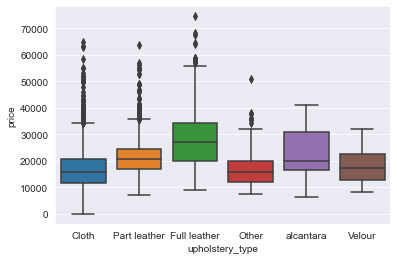

In [308]:
sns.boxplot(x="upholstery_type", y="price", data=df)

### upholstery_color column       

In [262]:
df.upholstery_color.value_counts(dropna=False)

 Black     7429
NaN        4872
 Grey      1005
 Other      924
Black       357
 Brown      193
Grey        156
 Beige       50
 Blue        14
Brown        12
 White       11
 Red          9
 Yellow       4
Blue          2
White         2
 Orange       1
Beige         1
Name: upholstery_color, dtype: int64

In [263]:
df.groupby(["make_model","body_type", "upholstery_type"])["upholstery_color"].describe()

count unique     top freq
make_model     body_type upholstery_type                          
Audi A1        Compact   Cloth             737      7   Black  570
                         Full leather        6      1   Black    6
                         Other              26      2   Black   19
                         Part leather       46      2   Black   45
                         Velour              6      2   Black    5
...                                        ...    ...     ...  ...
Renault Espace Van       Cloth              47      4   Brown   20
                         Full leather      227      9   Brown   84
                         Other              12      4   Black    5
                         Part leather      114      4   Black   53
                         alcantara           2      1   Black    2

[148 rows x 4 columns]

In [264]:
df["upholstery_color"] = df.groupby(["make_model","body_type", "upholstery_type"])["upholstery_color"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.upholstery_color.mode()[0]))

In [265]:
df["upholstery_color"].isnull().sum()

0

### weight_kg column

In [266]:
df.weight_kg.value_counts(dropna=False)

NaN       6558
1163.0     561
1360.0     332
1165.0     276
1335.0     242
          ... 
1213.0       1
1960.0       1
1258.0       1
1167.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64

In [267]:
df.groupby(["make_model", "body_type"])["weight_kg"].describe().T

make_model      Audi A1                                                       \
body_type       Compact   Coupe        Other       Sedans Station wagon  Van   
count        494.000000     1.0     4.000000   904.000000     14.000000  0.0   
mean        1173.900810  1010.0  1212.500000  1258.597345   1228.571429  NaN   
std           99.214993     NaN    36.628768   175.787377    113.466847  NaN   
min          102.000000  1010.0  1165.000000  1035.000000   1125.000000  NaN   
25%         1135.000000  1010.0  1195.000000  1144.750000   1195.000000  NaN   
50%         1180.000000  1010.0  1217.500000  1195.000000   1205.000000  NaN   
75%         1200.000000  1010.0  1235.000000  1255.000000   1215.000000  NaN   
max         1792.000000  1010.0  1250.000000  1720.000000   1580.000000  NaN   

make_model  Audi A2      Audi A3                                         \
body_type  Off-Road      Compact  Convertible        Coupe        Other   
count           0.0   123.000000     7.000000     3.000000     3.000000   
mean            NaN  1321.121951  1519.285714  1260.000000  1318.333333   
std             NaN   180.387951   129.113276    17.320508   100.166528   
min             NaN  1155.000000  1355.000000  1250.000000  1205.000000   
25%             NaN  1255.000000  1415.000000  1250.000000  1280.000000   
50%             NaN  1280.000000  1555.000000  1250.000000  1355.000000   
75%             NaN  1300.000000  1605.000000  1265.000000  1375.000000   
max             NaN  1890.000000  1685.000000  1280.000000  1395.000000   

make_model                              Opel Astra                   \
body_type        Sedans Station wagon      Compact   Coupe Off-Road   
count       1578.000000    113.000000    79.000000     1.0      1.0   
mean        1398.173638   1318.362832  1286.189873  1350.0   1340.0   
std          173.974813     72.430516    76.856356     NaN      NaN   
min         1041.000000   1180.000000  1163.000000  1350.0   1340.0   
25%         1310.000000   1265.000000  1235.000000  1350.0   1340.0   
50%         1355.000000   1335.000000  1278.000000  1350.0   1340.0   
75%         1370.000000   1365.000000  1350.000000  1350.0   1340.0   
max         1905.000000   1585.000000  1503.000000  1350.0   1340.0   

make_model                                           Opel Corsa               \
body_type         Other       Sedans Station wagon      Compact        Coupe   
count         54.000000   496.000000    564.000000   478.000000    10.000000   
mean        1325.407407  1328.245968   1404.414894  1171.658996  1203.000000   
std           51.711653    86.346869    132.023525    93.071549   161.726106   
min         1263.000000  1188.000000   1178.000000     1.000000  1066.000000   
25%         1278.000000  1273.000000   1328.000000  1156.000000  1120.000000   
50%         1350.000000  1308.000000   1393.000000  1163.000000  1159.500000   
75%         1360.000000  1360.000000   1425.000000  1199.000000  1199.000000   
max         1503.000000  1900.000000   1985.000000  1665.000000  1635.000000   

make_model                                                              \
body_type      Off-Road        Other       Sedans  Transporter     Van   
count          3.000000    79.000000   632.000000     6.000000     1.0   
mean        1187.666667  1169.253165  1171.593354  1181.000000  1124.0   
std           42.723920    18.735314    78.489993    19.718012     NaN   
min         1163.000000  1141.000000  1086.000000  1163.000000  1124.0   
25%         1163.000000  1163.000000  1141.000000  1163.000000  1124.0   
50%         1163.000000  1163.000000  1163.000000  1181.000000  1124.0   
75%         1200.000000  1163.000000  1173.000000  1199.000000  1124.0   
max         1237.000000  1237.000000  1960.000000  1199.000000  1124.0   

make_model Opel Insignia                                               \
body_type        Compact Coupe     Off-Road        Other       Sedans   
count          19.000000   0.0     6.000000    39

In [268]:
df["weight_kg"] = df.groupby(["make_model","body_type"])["weight_kg"].apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.weight_kg.mode()[0]))

In [269]:
df["weight_kg"].isnull().sum()

0

In [270]:
df["weight_kg"].value_counts()

1163.0    1546
1360.0    1312
1487.0     933
1135.0     791
1165.0     749
          ... 
1394.0       1
1649.0       1
1382.0       1
2080.0       1
2037.0       1
Name: weight_kg, Length: 434, dtype: int64

### consumption_comb column

In [271]:
df.consumption_comb.value_counts(dropna=False)

NaN     1821
3.9      701
4.0      656
5.4      650
4.4      613
        ... 
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: consumption_comb, Length: 73, dtype: int64

In [272]:
df[['consumption_comb', 'consumption_city','consumption_country']].isnull().sum()

consumption_comb       1821
consumption_city       3165
consumption_country    3232
dtype: int64

In [273]:
(df["consumption_country"]*63 + df["consumption_city"]*37)/100

0        3.796
1        5.588
2        3.770
3        3.796
4        4.096
         ...  
15037    5.255
15038      NaN
15039    5.255
15040    5.255
15041    6.810
Length: 15042, dtype: float64

In [274]:
 df["consumption_comb"].fillna((df["consumption_country"]*63 + df["consumption_city"]*37)/100).isnull().sum()

1821

In [275]:
df.groupby(["make_model", "body_type"])['consumption_comb'].describe().T

make_model     Audi A1                                                  \
body_type      Compact Coupe     Other       Sedans Station wagon  Van   
count       924.000000   1.0  8.000000  1353.000000     20.000000  0.0   
mean          4.473810   4.2  4.587500     4.476127      4.345000  NaN   
std           0.542781   NaN  0.655608     2.784331      0.579905  NaN   
min           3.000000   4.2  3.800000     3.000000      3.400000  NaN   
25%           4.200000   4.2  4.100000     3.900000      3.900000  NaN   
50%           4.400000   4.2  4.750000     4.200000      4.300000  NaN   
75%           4.800000   4.2  4.800000     4.800000      4.750000  NaN   
max          13.800000   4.2  5.800000    51.000000      5.800000  NaN   

make_model  Audi A2     Audi A3                                               \
body_type  Off-Road     Compact Convertible     Coupe     Other       Sedans   
count           1.0  128.000000    8.000000  4.000000  9.000000  2261.000000   
mean            4.9    4.155469    4.987500  4.050000  4.455556     4.355285   
std             NaN    0.625798    0.949342  0.369685  0.524669     1.598300   
min             4.9    3.000000    3.800000  3.800000  3.800000     1.600000   
25%             4.9    3.800000    4.650000  3.875000  4.100000     3.900000   
50%             4.9    4.000000    4.800000  3.900000  4.500000     4.000000   
75%             4.9    4.500000    5.100000  4.075000  4.800000     4.600000   
max             4.9    8.300000    7.100000  4.600000  5.300000    40.000000   

make_model               Opel Astra                                            \
body_type  Station wagon    Compact     Coupe Off-Road      Other      Sedans   
count         261.000000  96.000000  2.000000      1.0  47.000000  855.000000   
mean            4.514943   4.302083  6.200000      5.6   4.593617    4.835205   
std             0.530789   0.959054  0.565685      NaN   0.786131    0.867451   
min             3.300000   3.000000  5.800000      5.6   3.600000    0.000000   
25%             4.000000   3.700000  6.000000      5.6   3.700000    4.300000   
50%             4.500000   4.300000  6.200000      5.6   5.100000    4.700000   
75%             5.000000   5.000000  6.400000      5.6   5.100000    5.500000   
max             8.300000   6.600000  6.600000      5.6   6.800000    7.500000   

make_model                 Opel Corsa                                  \
body_type  Station wagon      Compact      Coupe  Off-Road      Other   
count        1004.000000  1120.000000  11.000000  3.000000  75.000000   
mean            4.652291     5.604107   4.763636  5.166667   5.305333   
std             0.899510     0.649535   0.836986  0.057735   0.445971   
min             3.000000     3.000000   3.100000  5.100000   3.800000   
25%             3.700000     5.200000   4.350000  5.150000   5.200000   
50%             4.500000     5.600000   5.100000  5.200000   5.200000   
75%             5.500000     6.000000   5.300000  5.200000   5.450000   
max             6.700000     7.000000   5.700000  5.200000   6.600000   

make_model                              Opel Insignia                  \
body_type       Sedans Transporter  Van       Compact Coupe  Off-Road   
count       737.000000    6.000000  0.0     18.000000   0.0  7.000000   
mean          5.405834    4.550000  NaN      5.266667   NaN  6.085714   
std           0.648016    0.821584  NaN      0.855432   NaN  0.273426   
min           3.100000    3.800000  NaN      3.900000   NaN  5.700000   
25%           5.200000    3.800000  NaN      4.300000   NaN  6.000000   
50%           5.300000    4.550000  NaN      5.550000   NaN  6.000000   
75%           5.700000    5.300000  NaN      5.875000   NaN  6.200000   
max           7.800000    5.300000  NaN      6.700000   NaN  6.500000   

make_model                                           Renault Clio        \
body_type       Other      Sedans Station wagon  Van      Compact Coupe   
count       38.000000  695.000000  

In [276]:
df.groupby(["make_model", "body_type", "hp_kw"])['consumption_comb'].describe().T

make_model    Audi A1                                                       \
body_type     Compact                                                        
hp_kw           60.0        66.0        70.0       71.0        85.0  86.0    
count       56.000000  128.000000  311.000000  29.000000  308.000000   0.0   
mean         4.310714    3.881250    4.445981   4.351724    4.595779   NaN   
std          0.100324    0.205342    0.563664   0.087099    0.468710   NaN   
min          4.200000    3.000000    4.000000   4.200000    3.000000   NaN   
25%          4.200000    3.700000    4.300000   4.400000    4.400000   NaN   
50%          4.400000    3.900000    4.400000   4.400000    4.800000   NaN   
75%          4.400000    4.100000    4.600000   4.400000    4.900000   NaN   
max          4.400000    4.100000   13.800000   4.400000    4.900000   NaN   

make_model                                                                  \
body_type                                          Coupe       Other         
hp_kw           92.0  93.0       110.0 141.0 147.0 70.0  85.0  60.0  70.0    
count       61.000000   1.0  20.000000   2.0   8.0   1.0   0.0   1.0   1.0   
mean         5.037705   4.9   4.970000   5.8   6.0   4.2   NaN   4.2   4.7   
std          0.129311   NaN   0.165752   0.0   0.0   NaN   NaN   NaN   NaN   
min          4.900000   4.9   4.700000   5.8   6.0   4.2   NaN   4.2   4.7   
25%          4.900000   4.9   4.925000   5.8   6.0   4.2   NaN   4.2   4.7   
50%          5.100000   4.9   5.000000   5.8   6.0   4.2   NaN   4.2   4.7   
75%          5.200000   4.9   5.100000   5.8   6.0   4.2   NaN   4.2   4.7   
max          5.200000   4.9   5.100000   5.8   6.0   4.2   NaN   4.2   4.7   

make_model                                                                 \
body_type                      Sedans                                       
hp_kw          85.0  140.0      60.0        66.0  67.0        70.0  71.0    
count       5.000000   1.0  83.000000  274.000000   1.0  419.000000   1.0   
mean        4.400000   5.8   4.230120    3.805839   3.7    4.920525   4.3   
std         0.547723   NaN   0.114482    0.172364   NaN    4.910935   NaN   
min         3.800000   5.8   3.900000    3.400000   3.7    4.000000   4.3   
25%         3.800000   5.8   4.200000    3.700000   3.7    4.200000   4.3   
50%         4.800000   5.8   4.200000    3.800000   3.7    4.400000   4.3   
75%         4.800000   5.8   4.200000    3.900000   3.7    4.400000   4.3   
max         4.800000   5.8   4.900000    4.300000   3.7   51.000000   4.3   

make_model                                                                \
body_type                                                                  
hp_kw            85.0  87.0       92.0  93.0      110.0 112.0      141.0   
count       478.000000   1.0  70.000000   0.0  9.000000   0.0  12.000000   
mean          4.391213   3.7   4.994286   NaN  4.766667   NaN   5.616667   
std           0.515144   NaN   0.173528   NaN  0.132288   NaN   0.057735   
min           3.000000   3.7   4.800000   NaN  4.700000   NaN   5.600000   
25%           3.800000   3.7   4.900000   NaN  4.700000   NaN   5.600000   
50%           4.800000   3.7   4.900000   NaN  4.700000   NaN   5.600000   
75%           4.800000   3.7   5.100000   NaN  4.700000   NaN   5.600000   
max           5.000000   3.7   5.900000   NaN  5.000000   NaN   5.800000   

make_model                                                                    \
body_type        Station wagon                                                 
hp_kw      147.0         60.0      66.0      70.0      85.0      92.0  110.0   
count        5.0           3.0  7.000000  3.000000  3.000000  3.000000   1.0   
mean         6.0           4.4  3.828571  4.300000  4.800000  4.966667   4.7   
std          0.0           0.0  0.221467  0.173205  1.053565  0.115470   NaN   
min          6.0           4.4  3.400000  4.200000  3.700000  4.900000   4.7   
25%          6.0           4.4  3.800

In [277]:
df.groupby(["make_model", "body_type", "fuel", "displacement_cc"])['consumption_comb'].describe().T

make_model      Audi A1                                                      \
body_type       Compact                                                       
fuel            Benzine                                                       
displacement_cc 300.0     900.0       1000.0     1400.0     1500.0  1800.0    
count               1.0  5.000000  631.000000  68.000000  14.000000     2.0   
mean                4.8  4.240000    4.573376   5.010294   5.064286     5.8   
std                 NaN  0.089443    0.456475   0.151746   0.049725     0.0   
min                 4.8  4.200000    4.000000   4.700000   5.000000     5.8   
25%                 4.8  4.200000    4.400000   4.900000   5.000000     5.8   
50%                 4.8  4.200000    4.500000   5.000000   5.100000     5.8   
75%                 4.8  4.200000    4.800000   5.125000   5.100000     5.8   
max                 4.8  4.400000   13.800000   5.200000   5.100000     5.8   

make_model                                                              \
body_type                                                Coupe           
fuel                                 Diesel            Benzine  Diesel   
displacement_cc 2000.0  9800.0      1400.0     1600.0  1000.0  1600.0    
count               8.0     1.0  127.000000  67.000000     1.0     0.0   
mean                6.0     4.8    3.882677   3.774627     4.2     NaN   
std                 0.0     NaN    0.205517   0.221799     NaN     NaN   
min                 6.0     4.8    3.000000   3.000000     4.2     NaN   
25%                 6.0     4.8    3.700000   3.700000     4.2     NaN   
50%                 6.0     4.8    3.900000   3.800000     4.2     NaN   
75%                 6.0     4.8    4.100000   4.000000     4.2     NaN   
max                 6.0     4.8    4.100000   4.000000     4.2     NaN   

make_model                                                                \
body_type           Other              Sedans                              
fuel              Benzine  Diesel     Benzine                              
displacement_cc   1000.0  1600.0      1000.0  1200.0     1400.0  1500.0    
count            6.000000     2.0  787.000000     1.0  75.000000     2.0   
mean             4.850000     3.8    4.806226     4.2   4.972000     5.0   
std              0.520577     0.0    3.587620     NaN   0.186403     0.0   
min              4.200000     3.8    3.900000     4.2   4.700000     5.0   
25%              4.725000     3.8    4.200000     4.2   4.900000     5.0   
50%              4.800000     3.8    4.400000     4.2   4.900000     5.0   
75%              4.800000     3.8    4.800000     4.2   5.100000     5.0   
max              5.800000     3.8   51.000000     4.2   5.900000     5.0   

make_model                                                          \
body_type                                                            
fuel                                Diesel                           
displacement_cc    1800.0  2000.0  1000.0      1400.0      1600.0    
count            12.000000     5.0     0.0  272.000000  199.000000   
mean              5.616667     6.0     NaN    3.802206    3.793970   
std               0.057735     0.0     NaN    0.169639    0.176566   
min               5.600000     6.0     NaN    3.400000    3.000000   
25%               5.600000     6.0     NaN    3.700000    3.700000   
50%               5.600000     6.0     NaN    3.800000    3.800000   
75%               5.600000     6.0     NaN    3.900000    4.000000   
max               5.800000     6.0     NaN    4.300000    4.300000   

make_model                                                         Audi A2  \
body_type       Station wagon                                 Van Off-Road   
fuel                  Benzine              Diesel         Benzine   Diesel   
displacement_cc       1000.0    1400.0    1400.0  1600.0  2000.0   1600.0    
count                7.000000  5.000000  7.000000     1.0     0.0      1.0   
mean              

In [278]:
df.groupby(["make_model", "body_type","fuel", "hp_kw"])['consumption_comb'].describe().T

make_model    Audi A1                                                      \
body_type     Compact                                                       
fuel          Benzine                                                       
hp_kw           60.0        70.0       71.0        85.0       92.0  93.0    
count       56.000000  311.000000  29.000000  242.000000  61.000000   1.0   
mean         4.310714    4.445981   4.351724    4.819421   5.037705   4.9   
std          0.100324    0.563664   0.087099    0.178963   0.129311   NaN   
min          4.200000    4.000000   4.200000    4.000000   4.900000   4.9   
25%          4.200000    4.300000   4.400000    4.800000   4.900000   4.9   
50%          4.400000    4.400000   4.400000    4.900000   5.100000   4.9   
75%          4.400000    4.600000   4.400000    4.900000   5.200000   4.9   
max          4.400000   13.800000   4.400000    4.900000   5.200000   4.9   

make_model                                                                     \
body_type                                                        Coupe          
fuel                                   Diesel                  Benzine Diesel   
hp_kw           110.0 141.0 147.0       66.0       85.0  86.0    70.0   85.0    
count       20.000000   2.0   8.0  128.000000  66.000000   0.0     1.0    0.0   
mean         4.970000   5.8   6.0    3.881250   3.775758   NaN     4.2    NaN   
std          0.165752   0.0   0.0    0.205342   0.223304   NaN     NaN    NaN   
min          4.700000   5.8   6.0    3.000000   3.000000   NaN     4.2    NaN   
25%          4.925000   5.8   6.0    3.700000   3.700000   NaN     4.2    NaN   
50%          5.000000   5.8   6.0    3.900000   3.800000   NaN     4.2    NaN   
75%          5.100000   5.8   6.0    4.100000   4.000000   NaN     4.2    NaN   
max          5.100000   5.8   6.0    4.100000   4.000000   NaN     4.2    NaN   

make_model                                                                \
body_type    Other                              Sedans                     
fuel       Benzine                   Diesel    Benzine                     
hp_kw        60.0  70.0  85.0  140.0  85.0       60.0  66.0        70.0    
count          1.0   1.0   3.0   1.0    2.0  83.000000   0.0  419.000000   
mean           4.2   4.7   4.8   5.8    3.8   4.230120   NaN    4.920525   
std            NaN   NaN   0.0   NaN    0.0   0.114482   NaN    4.910935   
min            4.2   4.7   4.8   5.8    3.8   3.900000   NaN    4.000000   
25%            4.2   4.7   4.8   5.8    3.8   4.200000   NaN    4.200000   
50%            4.2   4.7   4.8   5.8    3.8   4.200000   NaN    4.400000   
75%            4.2   4.7   4.8   5.8    3.8   4.200000   NaN    4.400000   
max            4.2   4.7   4.8   5.8    3.8   4.900000   NaN   51.000000   

make_model                                                                \
body_type                                                                  
fuel                                                                       
hp_kw      71.0        85.0       92.0  93.0      110.0 112.0      141.0   
count        1.0  283.000000  70.000000   0.0  9.000000   0.0  12.000000   
mean         4.3    4.805654   4.994286   NaN  4.766667   NaN   5.616667   
std          NaN    0.075582   0.173528   NaN  0.132288   NaN   0.057735   
min          4.3    4.200000   4.800000   NaN  4.700000   NaN   5.600000   
25%          4.3    4.800000   4.900000   NaN  4.700000   NaN   5.600000   
50%          4.3    4.800000   4.900000   NaN  4.700000   NaN   5.600000   
75%          4.3    4.800000   5.100000   NaN  4.700000   NaN   5.600000   
max          4.3    5.000000   5.900000   NaN  5.000000   NaN   5.800000   

make_model                                                                \
body_type                                                  Station wagon   
fuel                  Diesel                                     Benzine   
hp_kw      147.0       66.0  67.0  70.0        8

In [279]:
df.groupby(["make_model", "body_type", "fuel", "displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].mode()[0])).isna().sum()

0

In [280]:
df["consumption_comb"] = df.groupby(["make_model", "body_type", "fuel", "displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.interpolate().ffill().bfill()).fillna(df['consumption_comb'].mode()[0]))

In [281]:
df["consumption_comb"].isnull().sum()

0

In [282]:
df["consumption_comb"].value_counts()

3.900000    836
4.000000    701
5.400000    693
4.700000    670
4.400000    664
           ... 
5.133333      1
5.666667      1
5.733333      1
4.440000      1
4.685714      1
Name: consumption_comb, Length: 349, dtype: int64

### consumption_city column

In [283]:
df.consumption_city.value_counts(dropna=False)

NaN     3165
5.0      586
5.8      585
4.5      559
4.3      507
        ... 
9.0        1
66.0       1
10.4       1
10.5       1
9.7        1
Name: consumption_city, Length: 87, dtype: int64

In [284]:
df.drop(columns="consumption_city", inplace=True)

### consumption_country column

In [285]:
df.consumption_country.value_counts(dropna=False)

NaN     3232
4.2     1048
3.7      999
4.4      760
3.9      723
4.5      722
3.8      698
4.7      546
4.1      530
4.0      521
3.5      494
3.6      479
4.6      432
3.3      426
4.3      421
4.9      401
3.1      399
3.4      337
4.8      284
5.3      224
5.4      179
5.1      170
3.2      159
5.7      130
5.6      130
3.0      122
5.0       98
5.2       83
6.3       47
10.0      32
6.0       32
5.5       30
5.8       29
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
7.3        4
44.0       4
6.5        4
7.1        3
6.9        2
7.0        2
35.0       2
37.0       2
5.9        2
6.7        2
7.8        2
42.0       1
7.6        1
8.6        1
6.1        1
10.3       1
8.0        1
2.0        1
1.0        1
Name: consumption_country, dtype: int64

In [286]:
df.drop(columns="consumption_country", inplace=True)

In [287]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'km',
       'prev_owner', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'full_service', 'non_smoking_vehicle',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'insp_new', 'warranty_month', 'upholstery_type', 'upholstery_color',
       'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

In [288]:
df.drop(columns=['short_description','previous_owners', 'next_inspection','inspection_new','warranty', 'full_service','non_smoking_vehicle', "insp_new", "warranty_month"], inplace=True)

In [289]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'upholstery_color', 'weight_kg', 'consumption_comb',
       'age'],
      dtype='object')

In [290]:
df.shape

(15042, 28)

In [291]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

In [292]:
df.to_csv("filled_scout.csv", index=False)

In [293]:
pd.read_csv("filled_scout.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15042 non-null  object 
 1   body_type            15042 non-null  object 
 2   price                15042 non-null  float64
 3   km                   15042 non-null  float64
 4   prev_owner           15042 non-null  float64
 5   type                 15042 non-null  object 
 6   body_color           15042 non-null  object 
 7   paint_type           15042 non-null  object 
 8   nr_of_doors          15042 non-null  float64
 9   nr_of_seats          15042 non-null  float64
 10  gearing_type         15042 non-null  object 
 11  displacement_cc      15042 non-null  float64
 12  cylinders            15042 non-null  float64
 13  drive_chain          15042 non-null  object 
 14  fuel                 15042 non-null  object 
 15  co_2_emission        15042 non-null 

# PART- 3 `( Handling With Outliers )`

In [294]:
# In the 3rd notebook we handle with outliers.

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [594]:
#df.to_csv("final_scout_not_dummy.csv", index=False)


# Dummy Operation

## Export dataframe to csv file (dummy)

In [595]:
#df_dummied.to_csv("final_scout_dummy.csv", index=False)